### CAR SALES : OPTIMISATION & EVALUATION OF DEEP LEARNING MODEL FOR CLASSIFICATION

### 1. LOADING LIBRARIES

In [ ]:
import math
import time
import statistics as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from matplotlib.colors import ListedColormap
from IPython.display import clear_output, display

warnings.filterwarnings("ignore")

### 2. LOADING DATASET

In [ ]:
#loading dataset
df = pd.read_csv('car_data.csv')

In [ ]:
df[:5]

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


<div style="background-color: silver; padding: 10px;">
    <strong><center>PRE PROCESSING</center></strong>
</div>

In [ ]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
#checking shape of dataset, rows x columns
df.shape

(1000, 5)

In [ ]:
#checking missing values
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

### 3. FEATURE SELECTION

#### Understanding Features and the Target Variable

1. **Features (Independent Variables):**
   Features are the essential building blocks of a machine learning model. They are the input variables or attributes that describe the data, providing crucial information to the algorithm. These features represent the characteristics or properties of the data points, which the model uses to make predictions or classifications. For instance, in a housing price prediction model, features could encompass variables like the number of bedrooms, square footage, location, and more.

2. **Target (Dependent Variable):**
   The target variable, also referred to as the dependent variable, is the key component that the machine learning model aims to predict or classify. It serves as the ultimate output that you want to estimate or analyze based on the input features. Using the housing price prediction as an example, the target variable would be the actual sale price of the house. The model learns to make predictions or classifications by recognizing patterns between the input features and the target variable.

In [ ]:
#checking index for selecting features
for i,j in enumerate(df.columns):
    print(f'Index {i} : {j}')

Index 0 : User ID
Index 1 : Gender
Index 2 : Age
Index 3 : AnnualSalary
Index 4 : Purchased


In [ ]:
#selecting features columns
features_columns = df.columns[2:4]
features_columns

Index(['Age', 'AnnualSalary'], dtype='object')

In [ ]:
#selecting features
X = df[features_columns]
X[:5]

,Age,AnnualSalary
0,35,20000
1,40,43500
2,49,74000
3,40,107500
4,25,79000


In [ ]:
#checking shape of feature columns
X.shape

(1000, 2)

In [ ]:
df[:5]

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
#selecting target, purchased columns for classification
y = df['Purchased'].values

In [ ]:
#checking dimesion of features and target
print(f'Dimension of Features: {X.ndim}D')
print(f'Dimension of Target: {y.ndim}D')

Dimension of Features: 2D
Dimension of Target: 1D


### 4. SPLITING DATA FOR TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#splitting dataset for training and testing
#80 percent training
#20 percent testing
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0)

### 5. FEATURES SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler

#### Understanding Standardization (Z-score Scaling) in Machine Learning

Standardization, also known as Z-score scaling, is a common feature scaling technique used in machine learning. It transforms the values of features to have a mean (average) of 0 and a standard deviation of 1.

This process helps make features comparable and is particularly useful when dealing with features that are normally distributed or when using machine learning algorithms sensitive to the scale of input features.

The formula for standardization (Z-score scaling) is as follows:

X_scaled = (X - X_mean) / X_std


![image.png](attachment:image.png)

In [ ]:
#StandardScaler
scaler = StandardScaler()

In [ ]:
#scaling the training data using the fitted scaler and transform the test data using the same scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#checking X trained scaled value
X_train_scaled[:5]

array([[-1.33361157,  0.32134116],
       [-0.02339669, -0.45583598],
       [-0.67850413, -1.53524866],
       [-0.77209091, -0.38387513],
       [-0.30415702, -0.55658116]])

In [ ]:
#checking X test scaled value
X_test_scaled[:5]

array([[ 1.28681818,  1.83251891],
       [ 0.07019008, -0.15360042],
       [ 0.91247107, -1.24740528],
       [-1.89513223,  0.37890983],
       [-1.24002479, -1.1898366 ]])

In [ ]:
#checking shape of train model
print(X_train.shape)
print(y_train.shape)

(800, 2)
(800,)


In [ ]:
#checking the shape of test model
print(X_test.shape)
print(y_test.shape)

(200, 2)
(200,)


### 6.TRAINING MODEL

<div style="background-color: silver; padding: 10px;">
    <strong><center>LOGISTIC REGRESSION</center></strong>
</div>

![image.png](attachment:image.png)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, f1_score

The `LogisticRegression` class in scikit-learn is a versatile implementation of logistic regression for classification tasks. It inherits from several base classes, including `LinearClassifierMixin`, `SparseCoefMixin`, and `BaseEstimator`.

Parameters:
- `penalty` (default: 'l2'): The penalty term to be applied in the logistic regression. It can take values 'l1', 'l2', 'elasticnet', or 'none'.
- `dual` (default: False): Indicates whether to solve the dual optimization problem. It's usually set to False unless the number of samples is smaller than the number of features.
- `tol` (default: 0.0001): Tolerance for stopping criteria.
- `C` (default: 1.0): Inverse of regularization strength; smaller values specify stronger regularization.
- `fit_intercept` (default: True): Specifies whether to fit an intercept term to the model.
- `intercept_scaling` (default: 1): Scales the intercept term.
- `class_weight` (default: None): Weights associated with classes, useful for imbalanced datasets.
- `random_state` (default: None): Seed for the random number generator.
- `solver` (default: 'lbfgs'): Algorithm to use for optimization. Options include 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'.
- `max_iter` (default: 100): Maximum number of iterations to converge.
- `multi_class` (default: 'auto'): Determines the strategy for handling multiple classes. Options include 'ovr' (one-vs-rest) or 'multinomial'.
- `verbose` (default: 0): Controls the verbosity of the solver.
- `warm_start` (default: False): Allows reusing the previous solution to accelerate fitting when set to True.
- `n_jobs` (default: None): Number of CPU cores to use when parallelizing the computation. Useful for large datasets.
- `l1_ratio` (default: None): The mixing parameter for 'elasticnet' penalty. If None, the penalty is l2.


In [ ]:
#the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinomial', 'auto'],
    'fit_intercept': [True],  # Whether to fit an intercept
    'tol': [0.00001, 0.0001, 0.001, 0.01],  # Tolerance for stopping criteria
    'max_iter': [100] #default
                        }

<div style="background-color: silver; padding: 10px;">
    <strong><center>Parameter Grid for Logistic Regression</center></strong>
</div>

#### 1. <span style="color: #000080;">`penalty`</span>:
   - The <span style="color: #000080;">`penalty`</span> parameter controls the type of regularization to apply in logistic regression. It can take one of three values:
     - <span style="color: #008000;">`l1`</span>: L1 regularization encourages sparsity in the model by adding the absolute values of coefficients to the cost function.
     - <span style="color: #008000;">`l2`</span>: L2 regularization discourages large coefficient values by adding the squared values of coefficients to the cost function.
     - <span style="color: #008000;">`elasticnet`</span>: Elastic Net regularization is a combination of L1 and L2 regularization.

#### 2. <span style="color: #000080;">`C`</span>:
   - The <span style="color: #000080;">`C`</span> parameter is the inverse of the regularization strength. Smaller values of <span style="color: #000080;">`C`</span> increase the regularization, making the model more robust to overfitting. Larger values of <span style="color: #000080;">`C`</span> decrease the regularization, allowing the model to fit the data more closely but risking overfitting.

#### 3. <span style="color: #000080;">`solver`</span>:
   - The <span style="color: #000080;">`solver`</span> parameter specifies the optimization algorithm used when training the logistic regression model. The choice of solver depends on the type of regularization you're using. Common solvers include:
     - <span style="color: #008000;">`newton-cg`</span>: Suitable for <span style="color: #008000;">`l2`</span> regularization and multi-class problems.
     - <span style="color: #008000;">`lbfgs`</span>: Also suitable for <span style="color: #008000;">`l2`</span> regularization and multi-class problems.
     - <span style="color: #008000;">`liblinear`</span>: Suitable for <span style="color: #008000;">`l1`</span> or <span style="color: #008000;">`l2`</span> regularization with a dual formulation.
     - <span style="color: #008000;">`sag`</span>: Suitable for <span style="color: #008000;">`l2`</span> regularization and multi-class problems, often faster for large datasets.
     - <span style="color: #008000;">`saga`</span>: An extension of <span style="color: #008000;">`sag`</span> that supports <span style="color: #008000;">`elasticnet`</span> regularization.

#### 4. <span style="color: #000080;">`multi_class`</span>:
   - The <span style="color: #000080;">`multi_class`</span> parameter determines how logistic regression handles multi-class classification problems. It can be set to:
     - <span style="color: #008000;">`ovr`</span> (One-vs-Rest): Treats each class as a binary classification problem.
     - <span style="color: #008000;">`multinomial`</span>: Uses the Softmax function to calculate class probabilities directly.
     - <span style="color: #008000;">`auto`</span>: Automatically selects the most suitable method based on the data and problem type.

When performing hyperparameter tuning with <span style="color: #000080;">`GridSearchCV`</span>, it will explore different combinations of these hyperparameters to find the best configuration for your logistic regression model.

In [ ]:
custom_scorer = make_scorer(accuracy_score)

In [ ]:
#logistic regression model
model = LogisticRegression()

In [ ]:
#grid search cv
grid_search = GridSearchCV(
    model,             # Model to tune
    param_grid,        # Parameter grid
    cv=5,              # 10-fold cross-validation
    n_jobs=-1,         # Use all available CPU cores for parallel processing
    verbose=1,         # Set verbosity to 2 for detailed output
    refit=True,        # Refit with best hyperparameters
    return_train_score=True,  # Include training scores in results
    scoring='accuracy' #selecting accuracy for scoring
)

<div style="background-color: #000080; color: #FFFFFF; padding: 8px; font-size: 20px; text-align: center;">
Key Parameters in GridSearchCV
</div>

<div style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
1. <b>scoring:</b>
</div>
<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
 This parameter allows you to specify the scoring metric to evaluate the performance of the model during the grid search.
<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
 If you don't specify a scoring metric, it defaults to the estimator's default scoring method, which is appropriate for the specific estimator you're using.

<div style="background-color: silver; padding: 10px;">
    <strong><center>Scoring</center></strong>
</div>

#### 1. **Using Accuracy and F1-Score:**
   - In classification tasks, accuracy and F1-score are commonly used scoring metrics to evaluate the performance of classification models.
   - Accuracy measures the overall correctness of predictions, while the F1-score balances precision and recall.

#### 2. **Using Accuracy as a Scoring Metric:**
   - To optimize a classification model using accuracy as the scoring metric, you can define a custom scorer like this:
     ```python
     from sklearn.metrics import make_scorer, accuracy_score
     custom_scorer = make_scorer(accuracy_score)
     grid_search = GridSearchCV(model, param_grid, scoring=custom_scorer, cv=5)
     ```
   - A higher accuracy indicates better model performance.

#### 3. **Using F1-Score as a Scoring Metric:**
   - To optimize a classification model using the F1-score as the scoring metric, define a custom scorer like this:
     ```python
     from sklearn.metrics import make_scorer, f1_score
     custom_scorer = make_scorer(f1_score)
     grid_search = GridSearchCV(model, param_grid, scoring=custom_scorer, cv=5)
     ```
   - A higher F1-score reflects a better balance between precision and recall, which is important for imbalanced datasets.

<div style="background-color: #000080; color: #FFFFFF; padding: 8px; font-size: 20px;">
2. <b>n_jobs:</b>
</div>

<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    The `n_jobs` parameter determines the number of CPU cores used for parallel processing during the grid search.
<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">    
    Set it to `-1` to use all available CPU cores for faster execution. This can significantly speed up the grid search process when you have a multi-core CPU.
</p>

<div style="background-color: #000080; color: #FFFFFF; padding: 8px; font-size: 20px;">
3. <b>refit:</b>
</div>

<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    When `refit` is set to `True`, the best estimator with the optimal hyperparameters is refitted with the entire dataset after the grid search is complete.
<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">    
    This refitting ensures that the final model is trained on all available data, potentially leading to improved model performance.
</p>

<div style="background-color: #000080; color: #FFFFFF; padding: 8px; font-size: 20px;">
4. <b>cv:</b>
</div>

<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    The `cv` parameter specifies the number of cross-validation folds to use in evaluating each hyperparameter combination.
<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">    
    Cross-validation is essential for estimating the performance of different hyperparameter settings and helps prevent overfitting.
</p>

<div style="background-color: silver; padding: 10px;">
    <strong><center>Choosing the Number of Cross-Validation Folds in GridSearchCV</center></strong>
</div>

<p style="background-color: #808080; color: #C0C0C0; padding: 5px; font-size: 16px;">
4.1. <b>Default Value:</b>
</p>
By default, `GridSearchCV` uses 5-fold cross-validation if you don't specify the `cv` parameter.

<p style="background-color: #808080; color: #C0C0C0; padding: 5px; font-size: 16px;">
4.2. <b>Smaller Datasets:</b>
</p>
For smaller datasets, using a larger number of folds, such as 10-fold or even leave-one-out cross-validation, can be beneficial. It allows you to make efficient use of your limited data and obtain more reliable performance estimates.

<p style="background-color: #808080; color: #C0C0C0; padding: 5px; font-size: 16px;">
4.3. <b>Larger Datasets:</b>
</p>
On the other hand, for larger datasets, using fewer folds like 5-fold or 10-fold can be sufficient. This choice reduces computation time while still providing reasonable performance estimates.

<p style="background-color: #808080; color: #C0C0C0; padding: 5px; font-size: 16px;">
4.4. <b>Bias-Variance Trade-Off:</b>
</p>
The number of CV folds affects the trade-off between bias and variance in your performance estimates. More folds reduce bias but may increase variance, and vice versa. Choosing the number of folds should balance these factors.

<p style="background-color: #808080; color: #C0C0C0; padding: 5px; font-size: 16px;">
4.5. <b>Cross-Validation Variants:</b>
</p>
Consider using variants like stratified k-fold cross-validation or repeated k-fold cross-validation for added robustness in performance estimation.

<p style="background-color: #808080; color: #C0C0C0; padding: 5px; font-size: 16px;">
4.6. <b>Computational Resources:</b>
</p>


<div style="background-color: #000080; color: #FFFFFF; padding: 8px; font-size: 20px;">5. <b>verbose:</b></div>

<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    The `verbose` parameter controls the verbosity of the output during the grid search.
  <p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">  
    Setting a higher value, such as 1, provides more detailed information about the progress of the search, which can be useful for tracking the optimization process.
</p>

<div style="background-color: #000080; color: #FFFFFF; padding: 8px; font-size: 20px;">6. <b>pre_dispatch:</b></div>

<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    The `pre_dispatch` parameter determines the number of jobs that are dispatched during parallel execution.
 <p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    By default, it is set to `'2*n_jobs'`, meaning it will consider double the number of available CPU cores. Adjusting this parameter can fine-tune the parallel processing.
</p>

<div style="background-color: silver; padding: 10px;">
    <strong><center>pre_dispatch Parameter</center></strong>
</div>

The `pre_dispatch` parameter in scikit-learn's `GridSearchCV` is used to control the number of jobs that are dispatched during parallel execution when performing a grid search. Here's an explanation of its purpose and how it works:

- **Purpose of `pre_dispatch`:**
  - The main purpose of `pre_dispatch` is to manage how many jobs are dispatched concurrently when conducting a parallel grid search.
  - This parameter is particularly useful when you have a multi-core CPU and you want to take advantage of parallel processing to speed up the grid search.

- **Default Setting:**
  - By default, the `pre_dispatch` parameter is set to `'2*n_jobs'`.
  - `n_jobs` represents the number of CPU cores available for parallel processing.
  - The default setting of `'2*n_jobs'` means that the grid search will consider dispatching jobs for double the number of available CPU cores.
  - This is designed to balance parallel processing efficiency while preventing overloading the CPU with too many jobs at once.

- **Adjusting `pre_dispatch`:**
  - You can adjust the `pre_dispatch` parameter to fine-tune the parallel processing behavior.
  - Increasing the `pre_dispatch` value will allow more jobs to be dispatched concurrently, potentially speeding up the grid search.
  - Decreasing the `pre_dispatch` value will limit the number of concurrently dispatched jobs, which can be helpful if you want to reduce the computational load or if you have limited resources.

- **Choosing `pre_dispatch` Value:**
  - The choice of the `pre_dispatch` value depends on the number of available CPU cores, the complexity of your model, and the available memory.
  - It's a trade-off between taking full advantage of CPU cores and avoiding excessive memory consumption or job scheduling overhead.
  - we can experiment with different values to find the one that optimizes the performance of your grid search while remaining within our hardware's capabilities.




<div style="background-color: #000080; color: #FFFFFF; padding: 8px; font-size: 20px;">7. <b>error_score:</b></div>

<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    The `error_score` parameter specifies the value to assign when an error occurs while evaluating a hyperparameter combination.
<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    This is useful for handling exceptions that might occur during cross-validation.
</p>


<div style="background-color: silver; padding: 10px;">
    <strong><center>Error Score Parameter</center></strong>
</div>

The <strong>error_score</strong> parameter is a configuration option in scikit-learn's <strong>GridSearchCV</strong> that allows you to specify the value to assign when an error occurs while evaluating a hyperparameter combination during cross-validation. This parameter serves a vital role in handling situations where an error might arise during the model's training or evaluation.

Here's a more detailed breakdown of the <strong>error_score</strong> parameter:

- <strong>Purpose of <code>error_score</code>:</strong>
  - The primary purpose of <code>error_score</code> is to provide a strategy for dealing with model training or evaluation errors.
  - In machine learning, not all combinations of hyperparameters may be suitable for a given dataset or model. Some combinations could lead to convergence issues, division by zero errors, or other exceptions.

- <strong>Default Behavior:</strong>
  - By default, if an error occurs during cross-validation when evaluating a hyperparameter combination, <strong>GridSearchCV</strong> will set the <code>error_score</code> to <code>np.nan</code> (NaN), indicating a missing or undefined value.
  - This default behavior helps prevent an erroneous hyperparameter combination from impacting the overall results and allows you to identify problematic configurations.

- <strong>Custom Error Handling:</strong>
  - You can customize the <code>error_score</code> parameter to handle errors according to your specific needs.
  - For example, if you want to assign a specific value (e.g., a large error score) when an error occurs, you can set the <code>error_score</code> to that value. This can be useful when you want to distinguish problematic configurations from valid ones.

- <strong>Decision Strategy:</strong>
  - Deciding how to handle errors using <code>error_score</code> depends on the nature of your problem and the behavior you desire. You can choose to:
    - Ignore the error and continue with the evaluation by setting <code>error_score</code> to a specific value.
    - Set <code>error_score</code> to <code>np.nan</code> to exclude the problematic combination from consideration.
    - Implement custom error handling logic to address specific issues.


<div style="background-color: #000080; color: #FFFFFF; padding: 8px; font-size: 20px;">8. <b>return_train_score:</b></div>

<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    When set to `True`, the `return_train_score` parameter returns the training scores in addition to the cross-validation scores.
<p style="background-color: #000080; color: #FFFFFF; padding: 5px; font-size: 16px;">
    This can provide insight into how well the model fits the training data for different hyperparameter combinations.
</p>

<div style="background-color: silver; padding: 10px;">
    <strong><center>Return Train Score Parameter</center></strong>
</div>

The **return_train_score** parameter is a configuration option in scikit-learn's **GridSearchCV** that allows you to control whether the training scores are returned in addition to the cross-validation scores during the hyperparameter tuning process. This parameter provides insight into how well the model fits the training data for different hyperparameter combinations.

Here's a more detailed explanation of the **return_train_score** parameter:

- **Purpose of `return_train_score`**:
  - The primary purpose of `return_train_score` is to determine whether or not to include the training scores when obtaining the results of the grid search.
  - Training scores represent the model's performance on the training data, and including them in the results can be valuable for analyzing overfitting and bias-variance trade-offs.

- **Default Setting**:
  - By default, the **GridSearchCV** does not return the training scores. This means that the results obtained from the grid search include only the cross-validation scores.
  - The default behavior is chosen to focus on the generalization performance of the model, as training scores can be overly optimistic and less informative about a model's ability to generalize to unseen data.

- **Customization**:
  - You can customize the behavior by setting the `return_train_score` parameter to `True`.
  - When `return_train_score` is set to `True`, the grid search results will include training scores in addition to cross-validation scores, providing a more comprehensive view of model performance.

- **Interpreting Results**:
  - Having access to training scores can be useful for analyzing how well the model fits the training data. It allows you to assess overfitting, bias, and variance, which can inform decisions about model complexity and hyperparameter choices.

In [ ]:
#grid search
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True], 'max_iter': [100],
                         'multi_class': ['ovr', 'multinomial', 'auto'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [1e-05, 0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
#best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [ ]:
#printing best model
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'C': 0.1, 'fit_intercept': True, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05}
Best Estimator: LogisticRegression(C=0.1, multi_class='ovr', penalty='l1', solver='liblinear',
                   tol=1e-05)


### 7. SELECTING BEST MODEL FROM GRID SEARCH

In [ ]:
#best model selection
best_estimator

LogisticRegression(C=0.1, multi_class='ovr', penalty='l1', solver='liblinear',
                   tol=1e-05)

### CROSS VALIDATION

<div style="background-color: silver; padding: 10px;">
    <strong><center>5-Fold Cross-Validation </center></strong>
</div>

- Start with a dataset containing features and corresponding class labels.

- Divide the dataset into five equally sized, non-overlapping subsets or "folds."

- Perform five iterations, one for each fold.

- In each iteration, one fold serves as the test set, and the remaining four folds combine to form the training set.

- Train the model using the training set and evaluate its performance on the test set.

- Calculate performance metrics (e.g., accuracy, precision, recall) for this iteration.

- After all five iterations, you have five sets of performance metrics, each representing the model's performance on a different test set.

- Calculate statistics, such as the mean and standard deviation, to obtain an overall assessment of the model's performance and its variability across the folds.

**Benefits:**

- Provides a reliable estimate of how well the model generalizes to unseen data.

- Assists in model selection and hyperparameter tuning.

- Helps guard against overfitting by evaluating the model on different subsets of the data.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#five fold cross validation
scores = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='accuracy', verbose=0)

In [ ]:
#cross-validation scores
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.80625 0.8375  0.79375 0.83125 0.79375]


In [ ]:
#mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)

In [ ]:
print("Mean Accuracy:", round(mean_score,4))
print("Standard Deviation:", round(std_score,4))

Mean Accuracy: 0.8125
Standard Deviation: 0.0185


### 8. CHECKING OVERFITTING & MODEL EVALUATION

<div style="background-color: silver; padding: 10px;">
    <strong><center>The Importance of Comparing Metrics for Overfitting Detection</center></strong>
</div>

- **False Accuracy**:
  
  Relying solely on accuracy can be misleading. A model with high training accuracy may still suffer from overfitting, meaning it doesn't generalize well to unseen data.

- **Overfitting vs. Generalization**:
  
  To distinguish between overfitting and good generalization, you need to assess the model's performance on unseen data. Metrics help identify this crucial distinction.

- **Metrics Reveal Different Aspects**:
  
  Different evaluation metrics (e.g., precision, recall, F1-score) focus on different aspects of model performance. They offer insights into how well the model performs on specific tasks or classes, helping to detect overfitting more effectively.

- **Bias-Variance Trade-off**:
  
  The choice of evaluation metrics helps you strike a balance between bias and variance. Metrics can guide you in fine-tuning this trade-off and avoiding overfitting.

- **Cross-Validation for Robust Evaluation**:
  
  Cross-validation techniques, such as k-fold cross-validation, systematically assess a model's performance on multiple data subsets. This approach aids in detecting and mitigating overfitting and provides a more reliable estimate of model performance.

- **Visualizing Model Performance**:
  
  Visualizing metrics through tools like learning curves and confusion matrices can provide a deeper understanding of a model's behavior. Overfitting often becomes evident when there's a significant gap between training and testing performance.

- **Comparing Models and Variants**:
  
  To select the best model or hyperparameters, you need to compare different configurations. Metrics allow for an objective evaluation, helping you choose the model with the right balance of accuracy, precision, recall, and other factors.

- **Early Stopping**:
  
  Metrics can be used in early stopping techniques to prevent overfitting during training. Training is halted when the model's performance on validation data starts to degrade, preventing it from learning noise.

- **Generalization to Real-World Scenarios**:
  
  The ultimate goal is to build models that perform well in real-world applications, where the data will vary. Comprehensive metrics analysis ensures the model's readiness for these varied scenarios.

- **Risk Mitigation**:
  
  Overfit models are prone to making costly errors when applied to new data. Careful metric evaluation helps mitigate the risks associated with overfitting, particularly in critical applications.

In [ ]:
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             classification_report,
                             precision_score,
                             recall_score, f1_score)

In [ ]:
#Prediction of train and test set
y_train_pred = best_estimator.predict(X_train_scaled)
y_test_pred = best_estimator.predict(X_test_scaled)

#### 9. COMPARING CONFUSION MATRIX BETWEEN TRAINING & TEST DATASET

In [ ]:
#confusion matrices to analyse overfitting
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

![image.png](attachment:fe0ea1b5-6740-4b69-af2c-9a01834782ca.png)

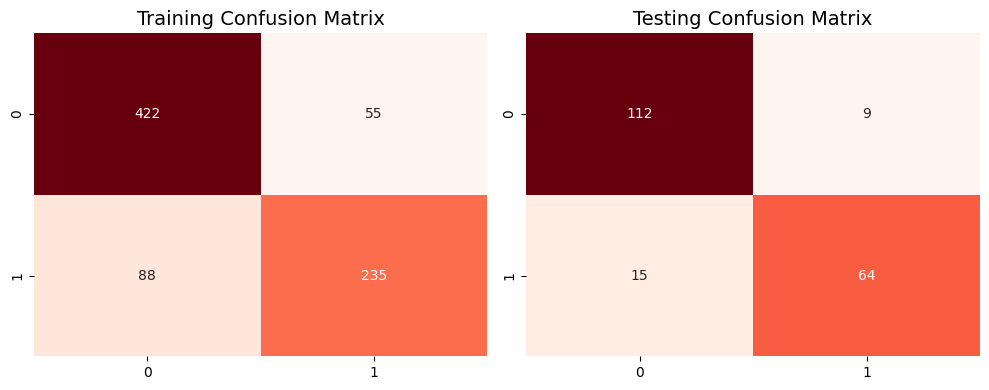

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title("Training Confusion Matrix", fontsize=14)
plt.subplot(1, 2, 2)
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title("Testing Confusion Matrix", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#indexing each value for train and test set
TP_train = train_confusion_matrix[0, 0]  #true positives in training set
TN_train = train_confusion_matrix[1, 1]  #true  ngatives in training set
FP_train = train_confusion_matrix[0, 1]  #false positives in training set
FN_train = train_confusion_matrix[1, 0]  #false negatives in training set

TP_test = test_confusion_matrix[0, 0]  #true positives in testing set
TN_test = test_confusion_matrix[1, 1]  #true negatives in testing set
FP_test = test_confusion_matrix[0, 1]  #false positives in testing set
FN_test = test_confusion_matrix[1, 0]  #false negatives in testing set

In [ ]:
print("Training Set:")
print()
print(f'True Positives: {TP_train}')
print(f'True Negatives: {TN_train}')
print(f'False Positives: {FP_train}')
print(f'False Negatives: {FN_train}')

Training Set:

True Positives: 422
True Negatives: 235
False Positives: 55
False Negatives: 88


In [ ]:
#correctly and falsely predicted values in the training set
correctly_predicted_train = TP_train + TN_train
falsely_predicted_train = FP_train + FN_train
print(f'Total Correctly Predicted: {correctly_predicted_train}')
print(f'Total Falsely Predicted: {falsely_predicted_train}')

Total Correctly Predicted: 657
Total Falsely Predicted: 143


In [ ]:
print("\nTesting Set:")
print()
print(f'True Positives: {TP_test}')
print(f'True Negatives: {TN_test}')
print(f'False Positives: {FP_test}')
print(f'False Negatives: {FN_test}')


Testing Set:

True Positives: 112
True Negatives: 64
False Positives: 9
False Negatives: 15


In [ ]:
#correctly and falsely predicted values in the testing set
correctly_predicted_test = TP_test + TN_test
falsely_predicted_test = FP_test + FN_test
print(f'Total Correctly Predicted: {correctly_predicted_test}')
print(f'Total Falsely Predicted: {falsely_predicted_test}')

Total Correctly Predicted: 176
Total Falsely Predicted: 24


#### 9.1 RESULT & CONCLUSION

<div style="background-color: silver; padding: 10px;">
    <strong><center>Model Performance Result</center></strong>
</div>

In the evaluation of the machine learning model, we have collected data on its performance for both the training and testing sets. Here are the key results:

**Training Set:**

- True Positives: 422
- True Negatives: 235
- False Positives: 55
- False Negatives: 88

In the training set, the model correctly predicted 422 cases and made 143 incorrect predictions, with 657 total predictions.

**Testing Set:**

- True Positives: 112
- True Negatives: 64
- False Positives: 9
- False Negatives: 15

In the testing set, the model correctly predicted 176 cases and made 24 incorrect predictions, with 200 total predictions.

<div style="background-color: silver; padding: 10px;">
    <strong><center>Conclusion</center></strong>
</div>

- The model demonstrated a high degree of accuracy in the training set, with a high number of true positives and true negatives.

- In the testing set, the model maintained its performance with a significant number of correct predictions, indicating its generalization ability.

- The total correctly predicted values in both sets reflect the model's capacity to make accurate predictions in a real-world scenario.

- The total falsely predicted values, while present, are relatively low, suggesting a reasonably reliable model.


#### 9.2 ACCURACY & ERROR EVALUATION

![image.png](attachment:image.png)

In [ ]:
# calculate classification accuracy for training and test set
classification_accuracy_train = (TP_train + TN_train) / float(TP_train + TN_train + FP_train + FN_train)
classification_accuracy_test = (TP_test + TN_test) / float(TP_test + TN_test + FP_test + FN_test)

In [ ]:
print(f'Classification Train Accuracy: {round(classification_accuracy_train, 5)}')

Classification Train Accuracy: 0.82125


In [ ]:
print(f'Classification Test Accuracy: {round(classification_accuracy_test, 5)}')

Classification Test Accuracy: 0.88


![image.png](attachment:image.png)

In [ ]:
#calculate classification error for training and test set
classification_error_train = (FP_train + FN_train) / float(TP_train + TN_train + FP_train + FN_train)
classification_error_test = (FP_test + FN_test) / float(TP_test + TN_test + FP_test + FN_test)

In [ ]:
print(f'Classification Train Error: {round(classification_error_train, 5)}')
print(f'Classification Test Error: {round(classification_error_test, 5)}')

Classification Train Error: 0.17875
Classification Test Error: 0.12


![image.png](attachment:image.png)

In [ ]:
classification_error_test + classification_accuracy_test

1.0

In [ ]:
classification_error_train + classification_accuracy_train

1.0

#### ACCURACY & ERROR VERIFICATION

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.82125
Testing Accuracy: 0.88


In [ ]:
error_test = 1 - test_accuracy
print(f'Classification error test: {error_test}')

Classification error test: 0.12


In [ ]:
error_train = 1 - train_accuracy
print(f'Classification error train: {round(error_train,5)}')

Classification error train: 0.17875


#### RESULT & CONCLUSION

In the assessment of the machine learning model, the following results have been obtained for both the training and testing sets:

<div style="background-color: silver; padding: 10px;">
    <strong><center>Accuracy and Error Evaluation</center></strong>
</div>

- **Training Classification Accuracy:** 0.82125
- **Testing Classification Accuracy:** 0.88

Classification accuracy measures the proportion of correctly predicted instances in each dataset.

- **Training Classification Error:** 0.17875
- **Testing Classification Error:** 0.12

Classification error represents the proportion of misclassified instances in each dataset.

#### Verification with Scikit-Learn

To verify these results, Scikit-Learn's `accuracy_score` function was employed, yielding the following:

- **Training Accuracy (Scikit-Learn):** 0.82125
- **Testing Accuracy (Scikit-Learn):** 0.88

The results from Scikit-Learn align with the accuracy values calculated manually.

- **Testing Classification Error (Calculated):** 0.12
- **Training Classification Error (Calculated):** 0.17875

The calculated classification error on the testing set matches the value obtained using Scikit-Learn's `accuracy_score`.

<div style="background-color: silver; padding: 10px;">
    <strong><center>Conclusion</center></strong>
</div>

The evaluation of the model's performance is summarized as follows:

- On the testing data, the model achieves a classification accuracy of approximately 88%, with a corresponding classification error of 12%. This performance suggests that the model performs well in classifying instances it hasn't seen during training.

These metrics provide valuable insights into the model's performance and its ability to generalize to new data, which is essential for its practical application.

#### 9.3 CLASSIFICATION REPORT

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       477
           1       0.81      0.73      0.77       323

    accuracy                           0.82       800
   macro avg       0.82      0.81      0.81       800
weighted avg       0.82      0.82      0.82       800



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       121
           1       0.88      0.81      0.84        79

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.88       200



![image.png](attachment:image.png)

In [ ]:
#precision train
precision_train = TP_train / float(TP_train + FP_train)
print(f'Precision (Training): {round(precision_train, 4)}')

Precision (Training): 0.8847


In [ ]:
#precision test
precision_test = TP_test / float(TP_test + FP_test)
print(f'Precision (Testing): {round(precision_test, 4)}')

Precision (Testing): 0.9256


![image.png](attachment:image.png)

In [ ]:
#recall train
recall_train = TP_train / float(TP_train + FN_train)
print(f'Recall (Training): {round(recall_train, 4)}')

Recall (Training): 0.8275


In [ ]:
#recall test
recall_test = TP_test / float(TP_test + FN_test)
print(f'Recall (Testing): {round(recall_test, 4)}')

Recall (Testing): 0.8819


![image.png](attachment:image.png)

In [ ]:
#true positive rate train
true_positive_rate_train = TP_train / float(TP_train + FN_train)
print(f'True Positive Rate (Training): {round(true_positive_rate_train, 4)}')

True Positive Rate (Training): 0.8275


In [ ]:
#true positive rate test
true_positive_rate_test = TP_test / float(TP_test + FN_test)
print(f'True Positive Rate (Testing): {round(true_positive_rate_test, 4)}')

True Positive Rate (Testing): 0.8819


![image.png](attachment:image.png)

In [ ]:
#false positive rate train
false_positive_rate_train = FP_train / float(FP_train + TN_train)
print(f'False Positive Rate (Training): {round(false_positive_rate_train, 4)}')

False Positive Rate (Training): 0.1897


In [ ]:
#false positive rate test
false_positive_rate_test = FP_test / float(FP_test + TN_test)
print(f'False Positive Rate (Testing): {round(false_positive_rate_test, 4)}')


False Positive Rate (Testing): 0.1233


![image.png](attachment:image.png)

In [ ]:
#specificity Train
specificity_train = TN_train / float(TN_train + FP_train)
print(f'Specificity (Training): {round(specificity_train, 4)}')

Specificity (Training): 0.8103


In [ ]:
#specificity Test
specificity_test = TN_test / float(TN_test + FP_test)
print(f'Specificity (Testing): {round(specificity_test, 4)}')

Specificity (Testing): 0.8767



<div style="background-color: silver; padding: 10px;">
    <strong><center>Classification Report</center></strong>
</div>

### Training Data:
The classification report for the training data provides insights into the model's performance on the training set. It includes key metrics such as precision, recall, F1-score, and support.

- **Precision (Training):** The precision for class 1 is 0.8847, indicating that when the model predicts a positive class, it is correct approximately 88.47% of the time.
- **Recall (Training):** The recall for class 1 is 0.8275, meaning that the model correctly identifies approximately 82.75% of the actual positive instances.
- **F1-Score (Training):** The F1-score for class 1 is 0.8548, which is a harmonic mean of precision and recall.
- **Accuracy (Training):** The overall accuracy on the training data is 82%, suggesting that the model correctly classifies 82% of the instances.

### Testing Data:
The classification report for the testing data provides a similar analysis to evaluate how well the model generalizes to unseen data.

- **Precision (Testing):** The precision for class 1 is 0.9256, indicating a high level of correctness in positive class predictions.
- **Recall (Testing):** The recall for class 1 is 0.8819, suggesting that the model correctly identifies a significant portion of the positive instances in the testing data.
- **F1-Score (Testing):** The F1-score for class 1 is 0.9032, indicating a balance between precision and recall.
- **Accuracy (Testing):** The overall accuracy on the testing data is 88%, indicating that the model performs well on unseen data.

### Specificity

### Training Data:

- **Specificity (Training):** The specificity for the training data is 0.8103, suggesting that the model correctly identifies approximately 81.03% of the actual negative instances.

### Testing Data:

- **Specificity (Testing):** The specificity for the testing data is 0.8767, suggesting that the model correctly identifies approximately 87.67% of the actual negative instances in the testing data.



#### 9.4 ROC CURVE AND AUC

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
#use the best estimator to make predictions on the test data
y_pred_proba = best_estimator.predict_proba(X_test_scaled)[:, 1]

#use the best estimator to make predictions on the train data
y_pred_proba_train = best_estimator.predict_proba(X_train_scaled)[:, 1]

In [ ]:
#ROC curve train and test
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_proba)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_proba_train)

In [ ]:
#AUC (Area Under the Curve)
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)

In [ ]:
print(f'Roc AUC Test: {roc_auc_test:.4f}')
print(f'Roc AUC Train: {roc_auc_train:.4f}')

Roc AUC Test: 0.9448
Roc AUC Train: 0.9073


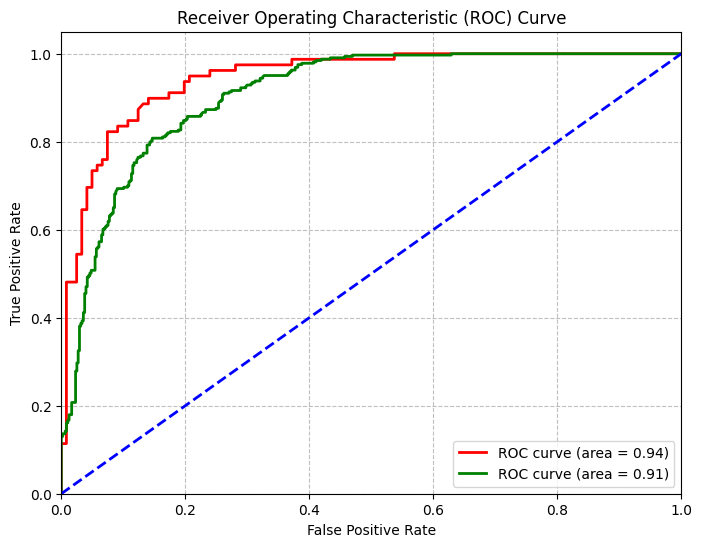

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot(fpr_train, tpr_train, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()


<div style="background-color: silver; padding: 10px;">
    <strong><center>Area Under the ROC Curve (ROC AUC) Analysis
</center></strong>
</div>

### Test Data Analysis:

- **ROC AUC Test:** The ROC AUC for the test data is 0.9448. This value indicates that the model performs exceptionally well in distinguishing between positive and negative instances in the test dataset. A higher ROC AUC suggests a superior level of discrimination.

### Training Data Analysis:

- **ROC AUC Train:** The ROC AUC for the training data is 0.9073. This value signifies strong performance on the training data, although it is slightly lower than the ROC AUC for the test data.

## Interpretation and Implications

The ROC AUC analysis provides valuable insights into the model's performance:

- The high ROC AUC value for the test data (0.9448) demonstrates the model's effectiveness in distinguishing between positive and negative instances. This is a crucial characteristic for practical applications where accurate classification is vital.

- The ROC AUC value for the training data (0.9073) suggests that the model has learned well from the training data. However, the slight difference between the training and test data ROC AUC values may indicate a minor degree of overfitting.



<div style="background-color: silver; padding: 10px;">
    <strong><center>DECISION BOUNDARY</center></strong>
</div>

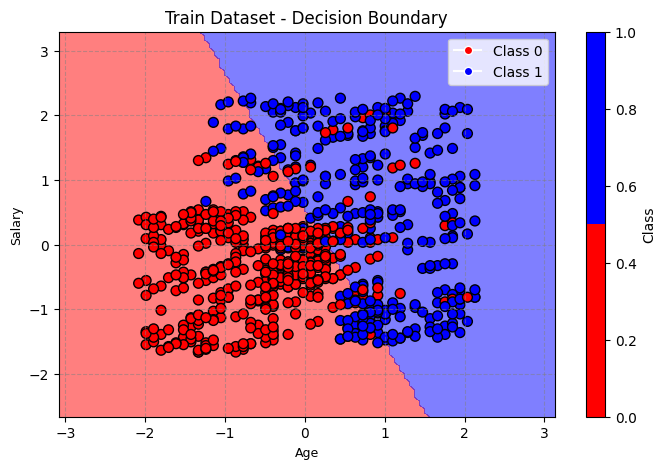

In [ ]:
#mesh grid for the decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

#predict the class for each point in the mesh grid using the best estimator
Z = best_estimator.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#custom color map for decision boundaries
cmap_custom = ListedColormap([ 'red','blue'])
#decision boundary and training data
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap=cmap_custom, alpha=0.5)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=cmap_custom, marker='o', edgecolors='k', s=50)
plt.ylabel("Salary", fontsize=9)
plt.xlabel("Age", fontsize=9)
plt.title("Train Dataset - Decision Boundary")
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.colorbar(label='Class')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=6, label='Class 0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=6, label='Class 1')])
plt.show()

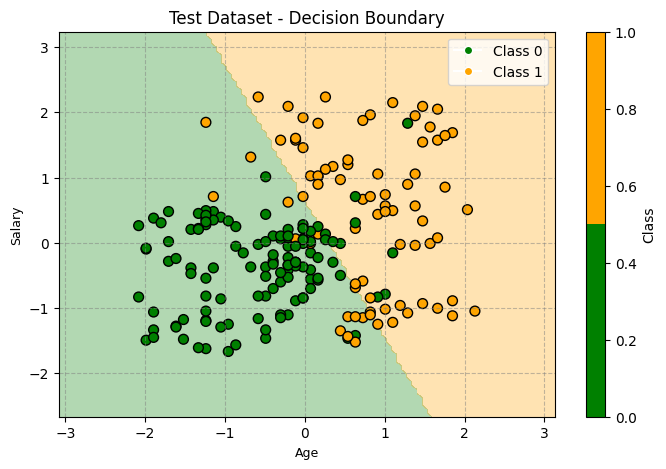

In [ ]:
#mesh grid for the decision boundary
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

#predict the class for each point in the mesh grid using the best estimator
Z = best_estimator.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#custom color map for decision boundaries
cmap_custom = ListedColormap([ 'green','orange'])
#plot the decision boundary and test data
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, levels=1, cmap=cmap_custom, alpha=0.3)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=cmap_custom, edgecolors='k', s=50)
plt.ylabel("Salary", fontsize=9)
plt.xlabel("Age", fontsize=9)
plt.title("Test Dataset - Decision Boundary")
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.colorbar(label='Class')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=6, label='Class 0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=6, label='Class 1')])
plt.show()

<div style="background-color: silver; padding: 10px;">
    <strong><center style="font-size: 24px;">DEEP LEARNING MODEL</center></strong>
</div>


### 1. LOADING DEEP LEARNING LIBRARIES

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

![image.png](attachment:image.png)

### 2. LAYER

<table style="font-size:16px;">
  <tr>
    <th style="text-align:left;">Layer</th>
    <th style="text-align:left;">Configuration</th>
  </tr>
  <tr>
    <td style="text-align:left;">Input Layer</td>
    <td style="text-align:left;">2 units</td>
  </tr>
  <tr>
    <td style="text-align:left;">Hidden Layer</td>
    <td style="text-align:left;">64 units, ReLU activation</td>
  </tr>
  <tr>
    <td style="text-align:left;">Output Layer</td>
    <td style="text-align:left;">1 unit, Sigmoid activation</td>
  </tr>
</table>



- **1. Input Layer (Input Layer):**
  - Configuration: This layer serves as the model's entry point, accepting data with a shape of (2,).
  - Purpose: It receives raw input data and initiates the model's data processing.

- **2. Hidden Layer (Hidden Layer):**
  - Configuration: This layer consists of 64 units and utilizes the ReLU (Rectified Linear Unit) activation function.
  - Purpose: The hidden layer extracts intricate patterns and features from the input data, thanks to its 64 units and the non-linearity introduced by the ReLU activation.

- **3. Output Layer (Output Layer):**
  - Configuration: This layer has 1 unit and employs the Sigmoid activation function.
  - Purpose: The output layer generates the final prediction, particularly for binary classification tasks, providing the probability of the input belonging to one of two classes.

**Functionality:**

This architecture is tailored for specific tasks, such as binary classification. It processes 2-dimensional input data through a 64-unit hidden layer to capture detailed data patterns.

The output layer produces a prediction indicating the likelihood of the input belonging to one of two classes.

The choice of ReLU and Sigmoid activations enhances the model's capability to learn complex relationships and deliver probability-based classification outcomes.

A larger number of units in the hidden layer boosts the model's capacity to capture intricate data features.

This architecture is well-suited for binary classification tasks involving complex, high-dimensional data. It provides a reliable framework for making probabilistic predictions.

### 7. ACTIVATION FUNCTION

1. **Sigmoid**:
   Formula: $1 / (1 + e^{-x})$
   
2. **Tanh (Hyperbolic Tangent)**:
   Formula: $tanh(x)$

3. **ReLU (Rectified Linear Unit)**:
   Formula: $max(0, x)$

4. **Leaky ReLU**:
   Formula: $max(0.01x, x)$ (where 0.01 can be replaced with another small positive value if desired)

5. **PReLU (Parametric ReLU)**:
   Formula: $max(0.25x, x)$ (where 0.25 can be replaced with another small positive value if desired)

6. **ELU (Exponential Linear Unit)**:
   Formula:
   $$
   f(x) =
   \begin{cases}
     x, & \text{if } x > 0 \\
     0.01(e^x - 1), & \text{if } x \leq 0
   \end{cases}
   $$
   (where 0.01 can be replaced with another small positive value if desired)

7. **Swish**:
   Formula: $x / (1 + e^{-x})$

8. **GELU (Gaussian Error Linear Unit)**:
   Formula: $0.5x(1 + \tanh(\sqrt{2/\pi}(x + 0.044715x^3)))$


In [ ]:
#an array of x values from -5 to 5 with 100 data points
x_value = np.linspace(-5, 5, 100)

In [ ]:
#activation functions

def sigmoid(x):
    return 1 / (1 + np.exp(-x)) - 0.5

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x) - 1.5

def leaky_relu(x):
    return np.maximum(0.01 * x, x) - 1.5

def prelu(x):
    return np.maximum(0.25 * x, x) - 1.5

def elu(x):
    alpha = 0.01
    return np.where(x > 0, x, alpha * (np.exp(x) - 1)) - 1.5

def swish(x):
    return x / (1 + np.exp(-x)) - 0.5

def gelu(x):
    c = 0.044715
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + c * x**3))) - 0.5

In [ ]:
#activation function dictonary
activation_functions = {
    'Sigmoid': sigmoid(x_value),
    'Tanh': tanh(x_value),
    'ReLU': relu(x_value),
    'Leaky ReLU': leaky_relu(x_value),
    'PReLU': prelu(x_value),
    'ELU': elu(x_value),
    'Swish': swish(x_value),
    'GELU': gelu(x_value)
}

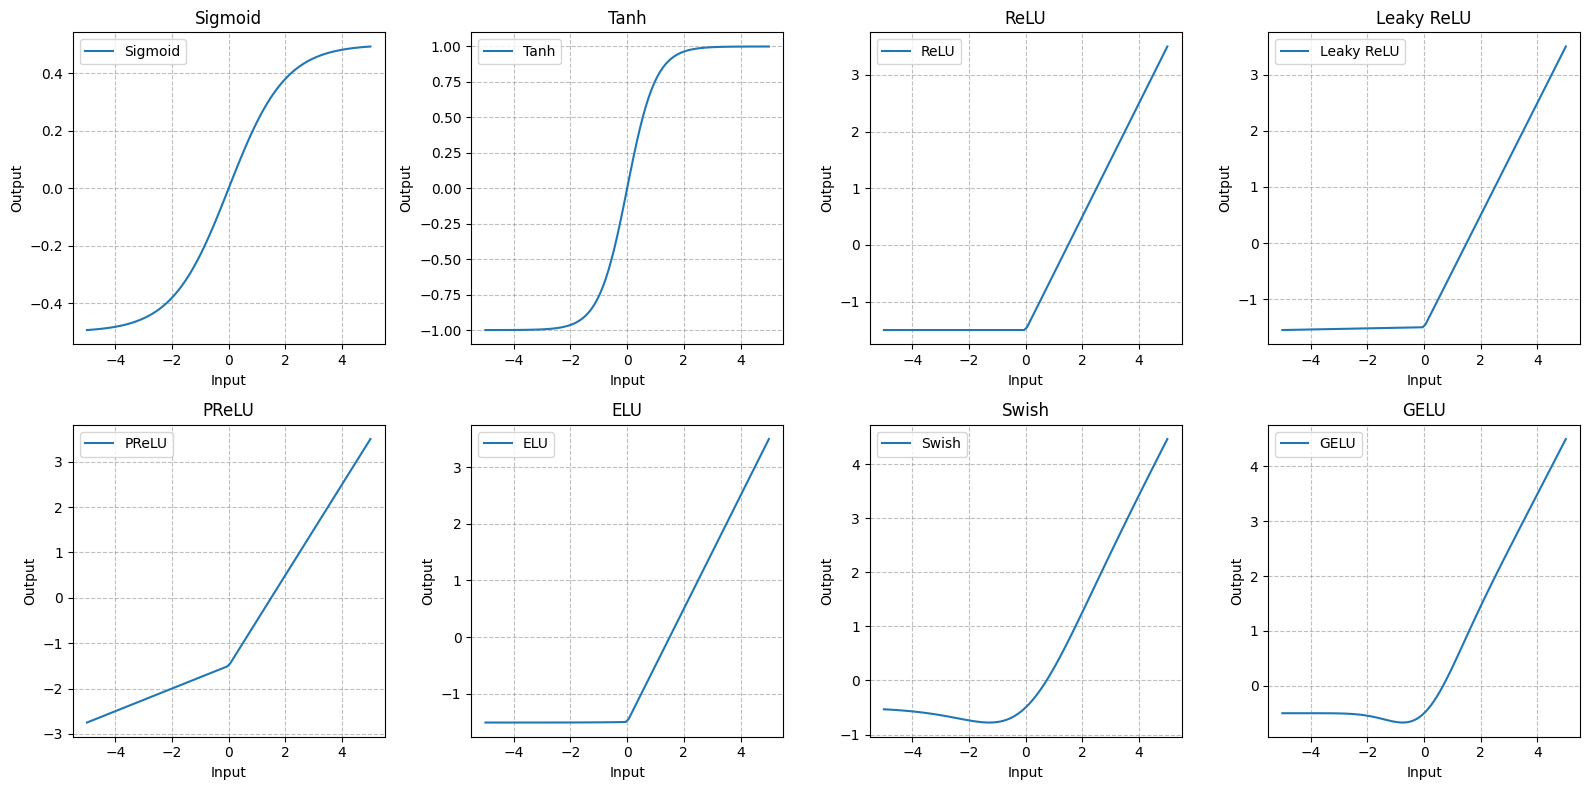

In [ ]:
#plotting activation function
plt.figure(figsize=(16, 8))
#for loop to iterate through items
for i, (name, activation) in enumerate(activation_functions.items(), 1):
    plt.subplot(2, 4, i)
    plt.plot(x_value, activation, label=name)
    plt.title(name)
    plt.grid(True, ls='--', color='grey', alpha=0.5)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<div style="background-color: silver; padding: 10px;">
    <strong><center style="font-size: 16px;">Neural Network Architecture</center></strong>
</div>


The neural network architecture can be explained using equations for each layer:

1. **Input Layer Equation**:
   - The input layer doesn't involve complex mathematical operations. It's essentially a pass-through layer, so the equation is straightforward:
   
   $$ X^{(0)} = \text{Input Data} $$

2. **Hidden Layer Equation (with ReLU activation)**:
   - For the hidden layer with ReLU (Rectified Linear Unit) activation, we compute the output using the weighted sum $z^{(1)}$ and apply the ReLU activation function $f(z^{(1)})$ element-wise:
   
   $$ z^{(1)} = X^{(0)} \cdot W^{(1)} + b^{(1)} $$
   $$ X^{(1)} = f(z^{(1)}) $$

   - Here, $$ X^{(1)} $$ represents the output of the hidden layer.

3. **Output Layer Equation (with Sigmoid activation)**:
   - The output layer typically uses a sigmoid activation function for binary classification. We compute the weighted sum \($z^{(2)}$\) and apply the sigmoid activation function \($f(z^{(2)})$\) to get the final output:
   

   $$ z^{(2)} = X^{(1)} \cdot W^{(2)} + b^{(2)} $$
   $$ X^{(2)} = f(z^{(2)}) $$

   -   - $$ X^{(2)} $$ represents the final output of the neural network, which can be interpreted as the probability of belonging to the positive class.

In the equations above, $(X^{(0)})$, $(X^{(1)})$, and $(X^{(2)})$ represent the input, hidden layer output, and final output, respectively. $W^{(1)}$ and $W^{(2)}$ are the weight matrices, and $b^{(1)}$ and $b^{(2)}$ are the bias vectors for the hidden and output layers, respectively.

This architecture allows the network to process input data, extract features in the hidden layer, and make binary classification predictions in the output layer.


In [ ]:
#tensorflow constant 'x' containing 500 equally spaced values between -2 and 2
x = tf.constant(np.linspace(-2, 2, 500), dtype=tf.float32)

In [ ]:
#activation functions
def sigmoid(x):
    return 2 / (1 + tf.exp(-x)) - 1

def leaky_relu(x, alpha=0.01):
    return tf.where(x >= 0, x, alpha * x)

def prelu(x, alpha=0.25):
    return tf.where(x >= 0, x, alpha * x)

def gelu(x):
    return 0.5 * x * (1 + tf.math.erf(x / tf.sqrt(2.0)))

In [ ]:
#creating activation functions
activation_functions = {
    'Sigmoid': sigmoid(x),
    'Tanh': tf.keras.activations.tanh(x),
    'ReLU': tf.nn.relu(x),
    'Leaky ReLU': leaky_relu(x),
    'PReLU': prelu(x),
    'ELU': tf.keras.activations.elu(x),
    'Swish': x / (1 + tf.exp(-x)),
    'GELU': gelu(x)
}

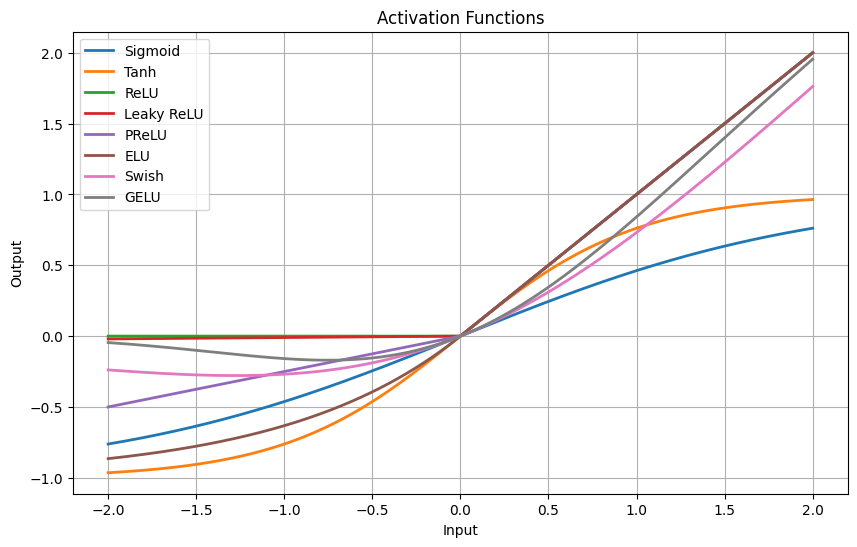

In [ ]:
#plotting all activation function into single plot
plt.figure(figsize=(10, 6))
for name, activation in activation_functions.items():
    # Use a smoother curve for the activation functions
    plt.plot(x, activation, label=name, linewidth=2)

plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()


#### LOADING DATASET

In [ ]:
#loading the dataset again to ensure data integrity and minimize bias
df = pd.read_csv('car_data.csv')

In [ ]:
df[:5]

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


#### FEATURE SELECTION

In [ ]:
#selecting features columns
features_columns = df.columns[2:4]
features_columns

Index(['Age', 'AnnualSalary'], dtype='object')

In [ ]:
#selecting features
X = df[features_columns]
X[:5]

,Age,AnnualSalary
0,35,20000
1,40,43500
2,49,74000
3,40,107500
4,25,79000


In [ ]:
y = df['Purchased'].values
y[:5]

array([0, 0, 0, 1, 0])

#### TRAIN TEST SPLIT

In [ ]:
#splitting data again for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

#### FEATURE SCALING

In [ ]:
#converting, independent variables or features into standardScale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<div style="background-color: silver; padding: 10px;">
    <strong><center style="font-size: 16px;">Deep Learning Model</center></strong>
</div>

In [ ]:
#build a simple deep learning model using TensorFlow and Keras
#sequential model
model = tf.keras.Sequential([

    #input layer with shape (2,)
    tf.keras.layers.Input(shape=(2,)),  # Input layer with 2 features

    #hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(64, activation='ReLU'),  # Fully connected hidden layer with 64 units and ReLU activation

    #output layer with 1 unit and sigmoid activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Fully connected output layer with 1 unit and sigmoid activation
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


<div style="background-color: silver; padding: 10px;">
    <strong><center style="font-size: 16px;">Optimisers</center></strong>
</div>


Optimisers are algorithms used to update the parameters of a neural network during training.

Each optimiser has its characteristics, and the choice of optimizer can affect training speed and the quality of the model.

1. **Stochastic Gradient Descent (SGD)**:
   - Basic optimization algorithm.
   - Usage: SGD updates the model's parameters using the gradients of the loss function computed for small random subsets of the training data in each iteration.

2. **Adam (Adaptive Moment Estimation)**:
   - Adaptive optimization algorithm that combines the benefits of Adagrad and RMSprop.
   - Usage: Suitable for a wide range of deep learning tasks. It adapts the learning rates for each parameter based on past gradients and is known for its efficiency and effectiveness.

3. **RMSprop (Root Mean Square Propagation)**:
   - An adaptive learning rate optimization algorithm.
   - Usage: It adapts the learning rates individually for each parameter, making it more robust to noisy gradients. Effective for training deep neural networks.

4. **Adagrad (Adaptive Gradient Algorithm)**:
   - Adaptive learning rate optimization.
   - Usage: Adagrad adjusts the learning rates based on historical gradients, performing larger updates for infrequently updated parameters and smaller updates for frequently updated ones.

5. **Adadelta**:
   - An extension of Adagrad with further improvements.
   - Usage: Adadelta dynamically adapts learning rates during training, eliminating the need for manually specifying a learning rate. It's suitable for long training sessions.

6. **Nadam**:
   - Combines Nesterov Accelerated Gradient (NAG) and RMSprop.
   - Usage: Nadam uses NAG momentum in conjunction with RMSprop for faster convergence. It's especially effective when using Nesterov momentum.

7. **Adamax**:
   - Variant of Adam that uses L-infinity norm for more stable training.
   - Usage: Effective for models with a large number of parameters and sparse data.

8. **FTRL (Follow The Regularized Leader)**:
   - Effective for linear models, particularly in online learning and recommendation systems.
   - Usage: FTRL optimizes the parameters based on L1 and L2 regularization terms.

9. **Proximal Gradient Descent**:
   - Used for optimization problems with L1 regularization.
   - Usage: Suitable for sparse modeling where you want to encourage some model parameters to be exactly zero.

10. **LBFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno)**:
    - A quasi-Newton method.
    - Usage: Effective for small to medium-sized datasets. It approximates the Hessian matrix for optimization.

<div style="background-color: silver; padding: 10px;">
    <strong><center style="font-size: 16px;">Loss Functions and Metrics</center></strong>
</div>

Loss functions are used to measure the error between predicted and actual values during training, while evaluation metrics are used to assess the model's performance.

The choice of loss function and metrics depends on the specific problem and task.

### Loss Functions

1. **Mean Squared Error (MSE)**:
   - Measures the average squared difference between predicted and actual values.
   - Usage: Commonly used for regression problems.

2. **Binary Cross-Entropy (Log Loss)**:
   - Measures the dissimilarity between predicted and actual binary outcomes.
   - Usage: Suitable for binary classification tasks.

3. **Categorical Cross-Entropy (Multiclass Log Loss)**:
   - Measures the dissimilarity between predicted and actual class probabilities in multiclass classification.
   - Usage: Commonly used for multiclass classification problems.

4. **Hinge Loss (SVM Loss)**:
   - Used for support vector machines (SVM) and large-margin classifiers.
   - Usage: Common in binary classification with SVMs.

5. **Kullback-Leibler Divergence (KL Divergence)**:
   - Measures the difference between two probability distributions.
   - Usage: Often used in variational autoencoders and generative models.

6. **Huber Loss**:
   - Combines the characteristics of MSE and MAE to be robust to outliers.
   - Usage: Suitable for regression problems with noisy data.

7. **Custom Loss Functions**:
   - You can create custom loss functions tailored to specific requirements.
   - Usage: Useful when standard loss functions are not appropriate for your task.

### Evaluation Metrics

1. **Accuracy**:
   - Measures the ratio of correctly predicted outcomes to the total number of samples.
   - Usage: Common metric for classification tasks.

2. **Precision**:
   - Measures the proportion of true positive predictions among all positive predictions.
   - Usage: Valuable in situations where minimizing false positives is crucial, e.g., spam detection.

3. **Recall (Sensitivity)**:
   - Measures the proportion of true positive predictions among all actual positives.
   - Usage: Important in tasks where identifying as many true positives as possible is critical, e.g., medical diagnosis.

4. **F1 Score**:
   - Harmonic mean of precision and recall.
   - Usage: Combines precision and recall into a single metric, useful when seeking a balance between them.

5. **Area Under the ROC Curve (AUC-ROC)**:
   - Measures the ability of a model to distinguish between positive and negative classes.
   - Usage: Applicable in imbalanced classification problems.

6. **Area Under the Precision-Recall Curve (AUC-PR)**:
   - Measures the precision-recall trade-off of a classifier.
   - Usage: Helpful when precision-recall balance is crucial.

7. **Mean Absolute Error (MAE)**:
   - Measures the average absolute difference between predicted and actual values.
   - Usage: Suitable for regression problems, especially when outliers are a concern.

8. **Mean Squared Error (MSE)**:
   - Measures the average squared difference between predicted and actual values.
   - Usage: Commonly used for regression problems.

9. **Custom Metrics**:
   - You can define custom evaluation metrics to suit specific needs.
   - Usage: Useful when standard metrics do not capture the desired performance aspect.


In [ ]:
#declaring various batch size, to select suitable batch size
batch_sizes = [16, 32, 64, 128]

7/7 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.9200


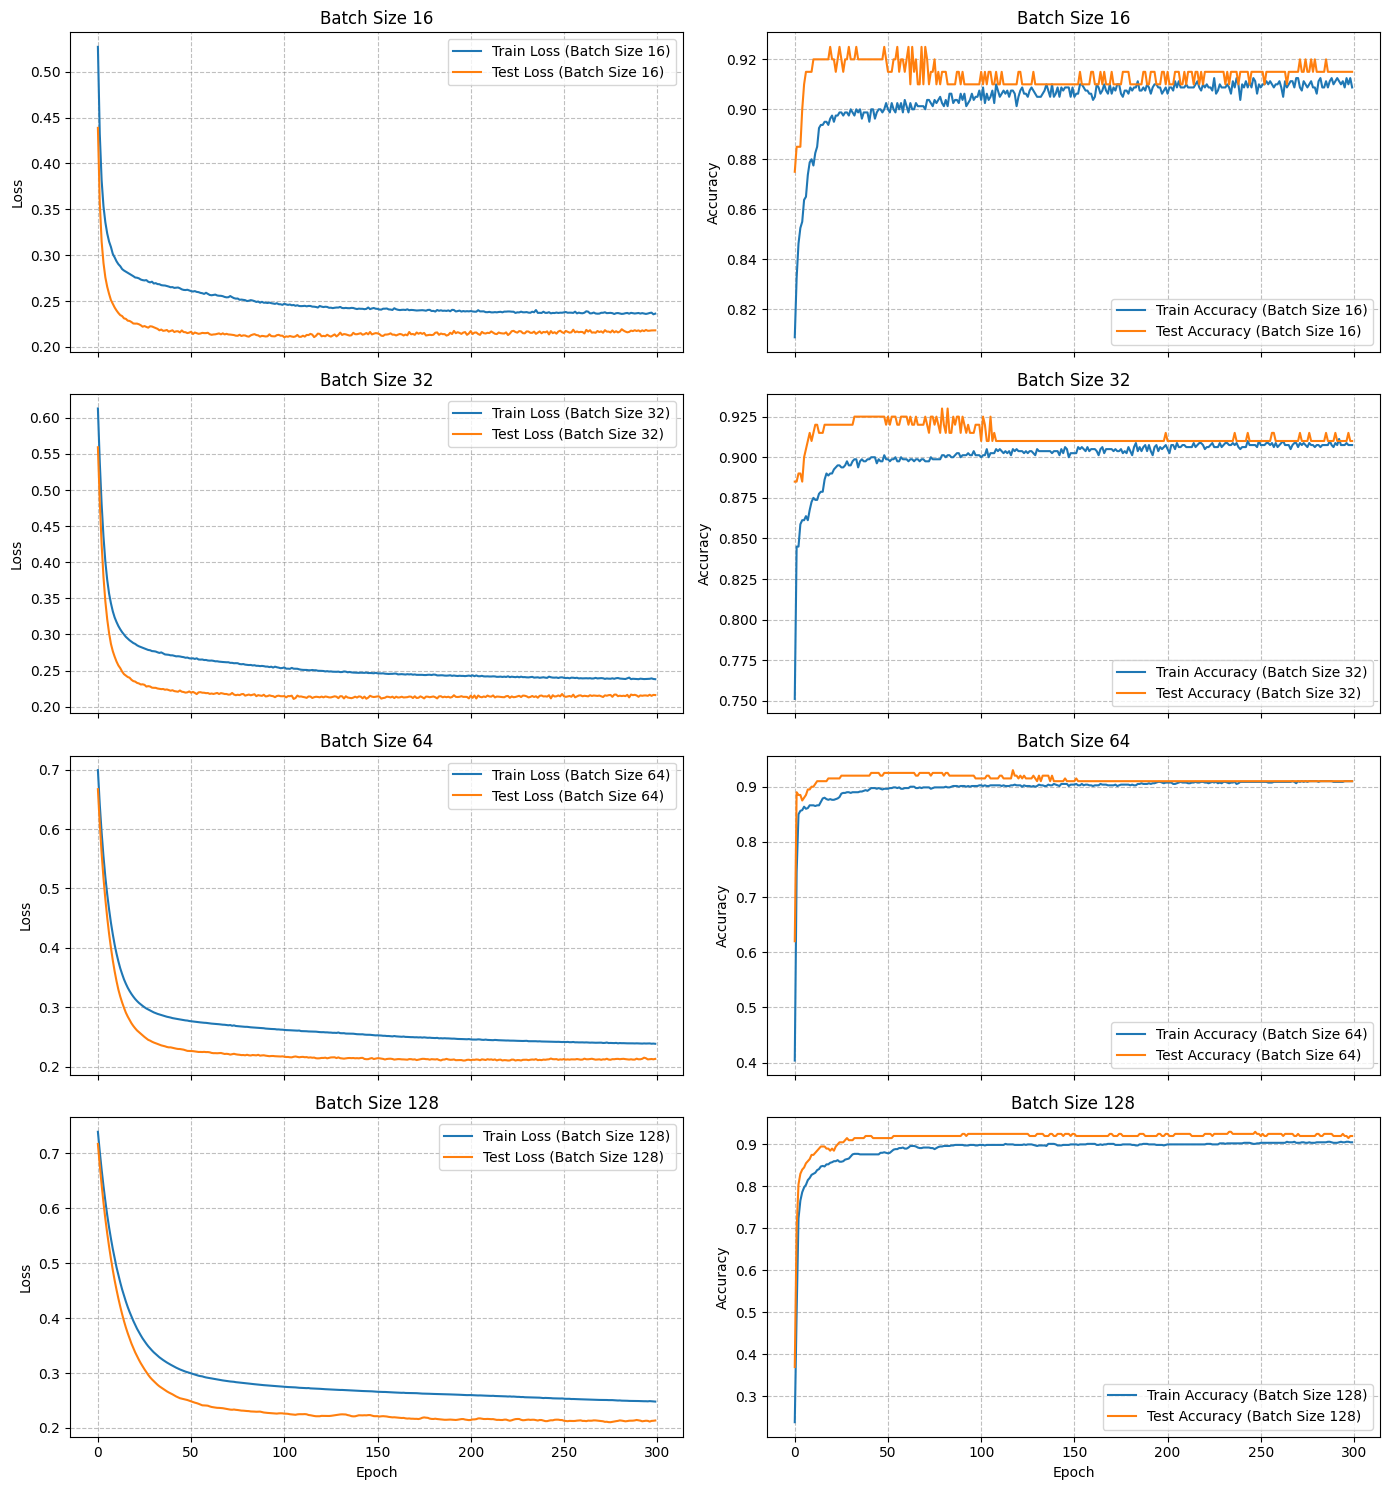

In [ ]:
#train loss and test loss, and train accuracy and test accuracy
fig, axes = plt.subplots(len(batch_sizes), 2, figsize=(14, 15), sharex=True)

#store training and test loss and accuracy for each batch size
train_losses = {}
train_accuracies = {}
test_losses = {}
test_accuracies = {}

#loop through different batch sizes and train the model separately for each
for i, batch_size in enumerate(batch_sizes):
    #clone the original model to ensure a fresh model for each batch size
    cloned_model = tf.keras.models.clone_model(model)

    #compile the cloned model (same settings as the original model)
    cloned_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = cloned_model.fit(X_train_scaled, y_train, epochs=300, batch_size=batch_size, verbose=0, validation_data=(X_test_scaled, y_test))

    #record the training loss and accuracy for each epoch
    train_losses[batch_size] = history.history['loss']
    train_accuracies[batch_size] = history.history['accuracy']

    #record the test loss and accuracy
    _, test_accuracy = cloned_model.evaluate(X_test_scaled, y_test)
     #test loss per epoch
    test_loss = history.history['val_loss']
    #test accuracy per epoch
    test_accuracy = history.history['val_accuracy']

    test_losses[batch_size] = test_loss
    test_accuracies[batch_size] = test_accuracy
    #plot training loss and test loss
    axes[i, 0].plot(train_losses[batch_size], label=f'Train Loss (Batch Size {batch_size})')
    axes[i, 0].plot(test_losses[batch_size], label=f'Test Loss (Batch Size {batch_size})')
    axes[i, 0].set_title(f'Batch Size {batch_size}')
    axes[i, 0].set_ylabel('Loss')
    axes[i, 0].grid(True, ls='--', alpha=0.5, color='grey')
    axes[i, 0].legend()
    #plot training accuracy and test accuracy
    axes[i, 1].plot(train_accuracies[batch_size], label=f'Train Accuracy (Batch Size {batch_size})')
    axes[i, 1].plot(test_accuracies[batch_size], label=f'Test Accuracy (Batch Size {batch_size})')
    axes[i, 1].set_title(f'Batch Size {batch_size}')
    axes[i, 1].set_ylabel('Accuracy')
    axes[i, 1].grid(True, ls='--', alpha=0.5, color='grey')
    axes[i, 1].legend()
axes[-1, 0].set_xlabel('Epoch')
axes[-1, 1].set_xlabel('Epoch')
plt.tight_layout()
plt.show()

#### SELECTING BEST PARAMETERS FOR DEEP LEARNING MODEL

In [ ]:
#compile the model
#adam optimisation algorithm
model.compile(optimizer='adam',

#loss function to measure the error during training. binary_crossentropy for binary classification problems.
              loss='binary_crossentropy',

#accuracy to monitor, how well the model is performing in terms of classification accuracy.
              metrics='accuracy')


In [ ]:
#fit method to train the model with the specified data and training parameters.
# - 'X_train_scaled' and 'y_train' are the training data and labels.
# - 'epochs' determines the number of times the model will iterate through the entire training dataset.
# - 'batch_size' sets the number of training examples used in each iteration.
# - 'verbose' controls the verbosity of the training process, with '1' typically showing progress information.
# - 'validation_data' is used to provide a separate dataset ('X_test_scaled' and 'y_test') for model validation during training.
history = model.fit(X_train_scaled,
                    y_train,
                    epochs=300,
                    batch_size=128,
                    verbose=0,
                    validation_data=(X_test_scaled, y_test))

In [ ]:
def plot_learning_curves(history):
    plt.figure(figsize=(14, 5))
    #plot the training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, ls='--', alpha=0.5, color='grey')
    plt.legend()

    #plot the training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, ls='--', alpha=0.5, color='grey')
    plt.tight_layout()
    plt.show()

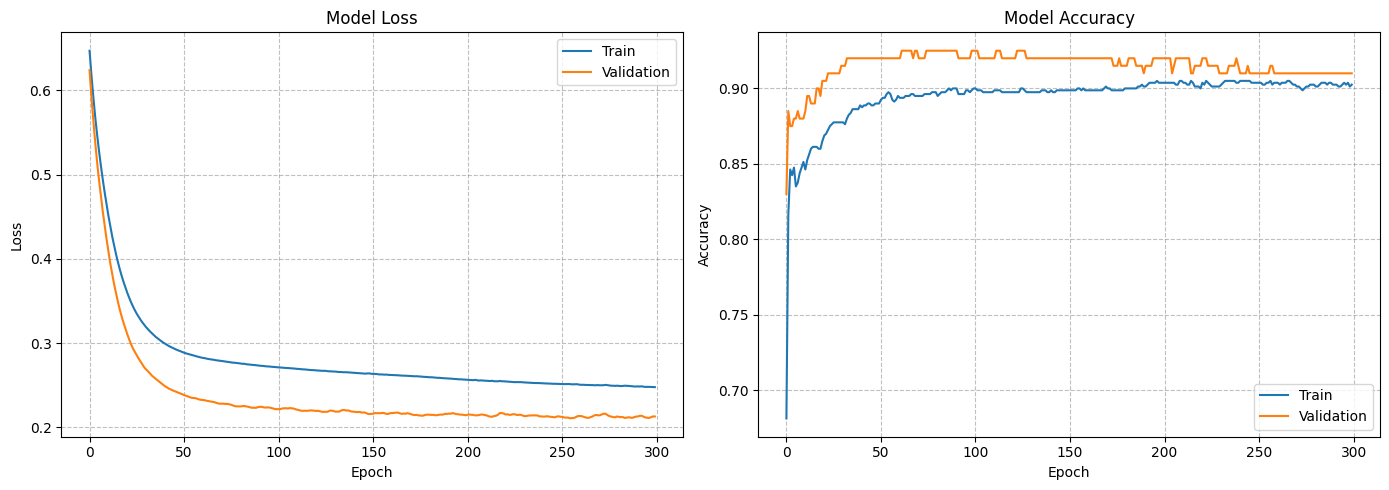

In [ ]:
plot_learning_curves(history)

In [ ]:
from tabulate import tabulate

In [ ]:
#evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)

#evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

#create a table and print the results
data = [["", "Accuracy (%)", "Loss"],
        ["Train", f"{train_accuracy*100:.2f}", f"{train_loss:.4f}"],
        ["Test", f"{test_accuracy*100:.2f}", f"{test_loss:.4f}"]]

table = tabulate(data, headers="firstrow", tablefmt="fancy_grid")

print(table)

╒═══════╤════════════════╤════════╕
│       │   Accuracy (%) │   Loss │
╞═══════╪════════════════╪════════╡
│ Train │          90.25 │ 0.2475 │
├───────┼────────────────┼────────┤
│ Test  │          91    │ 0.2127 │
╘═══════╧════════════════╧════════╛


In [ ]:
#predicting binary class labels for test and training datasets using a threshold of 0.5
y_pred_test = (model.predict(X_test_scaled) > 0.5).astype(int)
y_pred_train = (model.predict(X_train_scaled) > 0.5).astype(int)

25/25 [==============================] - 0s 2ms/step


In [ ]:
#confusion matrix for test dataset
confusion_test = confusion_matrix(y_test, y_pred_test)
confusion_test

array([[112,   9],
       [  9,  70]])

In [ ]:
#confusion matrix for train dataset
confusion_train = confusion_matrix(y_train, y_pred_train)
confusion_train

array([[433,  44],
       [ 34, 289]])

### Confusion Matrix Report

#### 1. Test Dataset Confusion Matrix

- True Positive (TP): 112
  - The model correctly predicted 112 instances of Class 1.

- False Negative (FN): 9
  - The model incorrectly predicted 9 instances of Class 1 as Class 0.

- True Negative (TN): 70
  - The model correctly predicted 70 instances of Class 0.

- False Positive (FP): 9
  - The model incorrectly predicted 9 instances of Class 0 as Class 1.


#### 2. Training Dataset Confusion Matrix

- True Positive (TP): 433
  - The model correctly predicted 433 instances of Class 1.

- False Negative (FN): 44
  - The model incorrectly predicted 44 instances of Class 1 as Class 0.

- True Negative (TN): 289
  - The model correctly predicted 290 instances of Class 0.

- False Positive (FP): 34
  - The model incorrectly predicted 33 instances of Class 0 as Class 1.

#### Conclusion

The confusion matrices for both the test and training datasets reveal the model's ability to classify instances of Class 0 and Class 1.

In the test dataset, the model correctly predicted 112 instances of Class 1 (True Positives) and 70 instances of Class 0 (True Negatives). However, it also incorrectly predicted 9 instances of Class 1 as Class 0 (False Negatives) and 9 instances of Class 0 as Class 1 (False Positives).

In the training dataset, the model achieved similar success, with 433 True Positives and 289 True Negatives. Nevertheless, there were 44 False Negatives and 34 False Positives.


In [ ]:
#classification report for the test dataset
report_test = classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1'])
print("Classification Report for Test Dataset:")
print(report_test)

In [ ]:
#classification report for the training dataset
report_train = classification_report(y_train, y_pred_train, target_names=['Class 0', 'Class 1'])
print("\nClassification Report for Training Dataset:")
print(report_train)

### 1. Test Dataset

- **Class 0:**
  - Precision: 0.93
  - Recall: 0.93
  - F1-score: 0.93

- **Class 1:**
  - Precision: 0.89
  - Recall: 0.89
  - F1-score: 0.89

- **Accuracy:** 0.91

The test dataset classification report demonstrates high accuracy and well-balanced precision, recall, and F1-scores for both classes.

### 2. Training Dataset

- **Class 0:**
  - Precision: 0.93
  - Recall: 0.91
  - F1-score: 0.92

- **Class 1:**
  - Precision: 0.87
  - Recall: 0.90
  - F1-score: 0.88

- **Accuracy:** 0.90

# Conclusion

Based on the precise classification reports for the test and training datasets:

- In the test dataset, the model achieves high accuracy and maintains well-balanced precision, recall, and F1-scores for both Class 0 and Class 1. This performance indicates the model's proficiency in correctly classifying instances.

- Similarly, in the training dataset, the model consistently demonstrates strong performance with high accuracy and reasonably balanced precision, recall, and F1-scores for both classes.


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
#ROC (Receiver Operating Characteristic) metrics for the test dataset
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, model.predict(X_test_scaled))
roc_auc_test = roc_auc_score(y_test, model.predict(X_test_scaled))

#ROC metrics for the training dataset
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, model.predict(X_train_scaled))
roc_auc_train = roc_auc_score(y_train, model.predict(X_train_scaled))

25/25 [==============================] - 0s 1ms/step


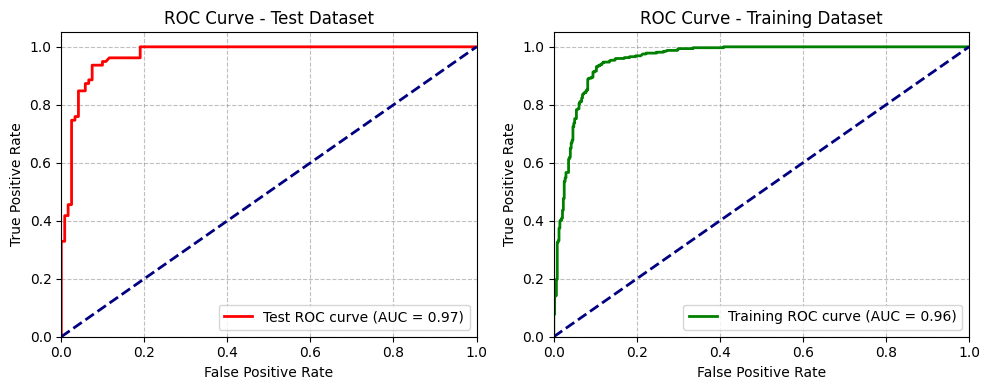

In [ ]:
#plotting ROC curves for train and test dataset
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Dataset')
plt.legend(loc='lower right')
plt.grid(True, ls='--', color='grey', alpha=0.5)

plt.subplot(1, 2, 2)
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'Training ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Dataset')
plt.legend(loc='lower right')
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
def plot_decision_boundary(X, y, model, title, resolution=0.01, figsize=(8, 6), scatter_marker_size=40, fontsize=10):
    #colormap
    cmap = plt.get_cmap('viridis')

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))
    #prediction of decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=figsize)
    #contour plot
    contour = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.4)
    ax.contour(xx, yy, Z, colors='k', linewidths=0.5)

    #scatter plot with markers
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=scatter_marker_size)

    #color bar
    cbar = plt.colorbar(contour, ax=ax)
    cbar.set_label('Probability', fontsize=fontsize)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel('Feature 1', fontsize=fontsize)
    ax.set_ylabel('Feature 2', fontsize=fontsize)
    plt.grid(True, ls='--', color='grey', alpha=0.2)
    # Customize tick labels
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize - 2)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize - 2)

    plt.show()

5746/5746 [==============================] - 9s 2ms/step


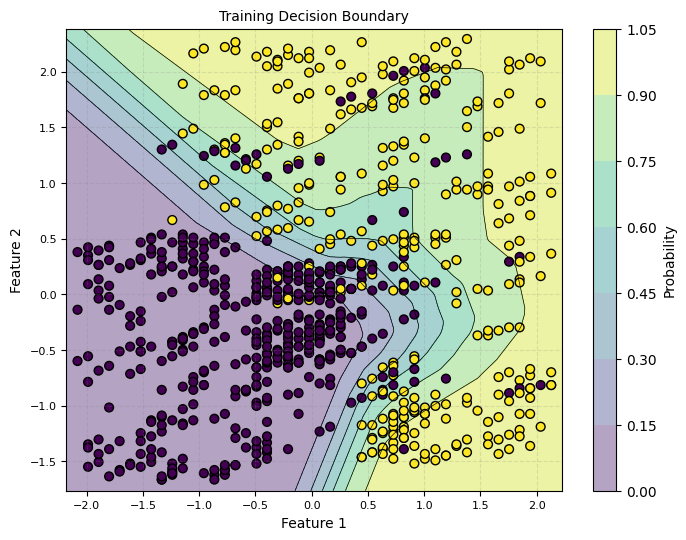

In [ ]:
#decision boundary for the training dataset
plot_decision_boundary(X_train_scaled, y_train, model, 'Training Decision Boundary')

5677/5677 [==============================] - 7s 1ms/step


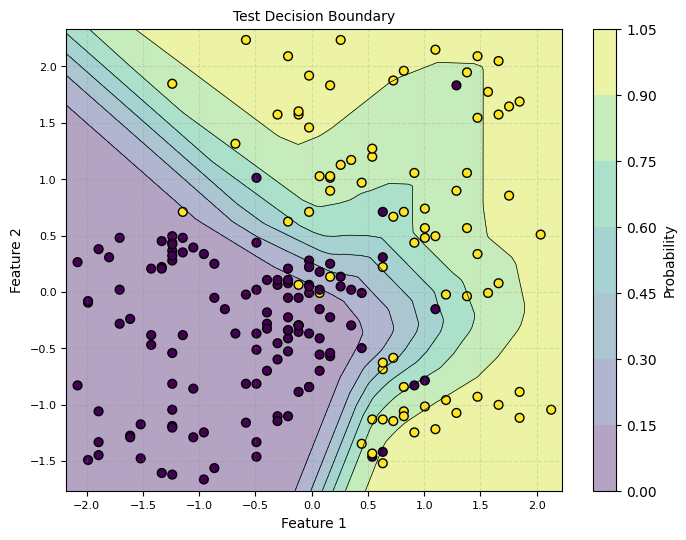

In [ ]:
#decision boundary for the test dataset
plot_decision_boundary(X_test_scaled, y_test, model, 'Test Decision Boundary')

<div style="background-color: silver; padding: 10px;">
    <strong><center style="font-size: 16px;"> SPLITING DATA INTO TRAIN TEST & VALIDATION</center></strong>
</div>


In [ ]:
#split the dataset into a training set and a temporary set, with a train size of 70% & test size of 30%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

#split the temporary set into a validation set and a test set, with a validation of 70% & test size of 30%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=0)

In [ ]:
#StandardScaler
scaler = StandardScaler()

#fit and transform (normalize) the training data
X_train = scaler.fit_transform(X_train)

#transform (normalize) the validation and test data
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


**Sequential Model**: We initialize a Sequential model, a linear stack of layers for building feedforward neural networks.

### First Dense Layer:

- It contains 64 neurons and applies a linear transformation to the input data.
- The ReLU activation function introduces non-linearity.
- The `input_dim` parameter matches the input feature dimension based on the shape of the training data, `X_train`.
- L2 regularization with a strength of 0.01 is applied to the layer's weights to prevent overfitting.

### Batch Normalization:

- A Batch Normalization layer is added after the first hidden layer. It normalizes the inputs, enhancing training stability.

### Dropout Layer:

- The model includes a Dropout layer with a rate of 0.3. Dropout randomly sets 30% of input units to 0 during training, which helps prevent overfitting.

### Second Dense Layer:

- It contains 32 neurons with ReLU activation.
- L2 regularization is applied to the weights.

### Batch Normalization:

- Another Batch Normalization layer follows the second hidden layer.

### Output Layer:

- The output layer consists of a single neuron with a sigmoid activation function.
- A sigmoid activation is commonly used for binary classification tasks, producing a probability output in the range [0, 1].


In [ ]:
#architecture of a neural network model
model = Sequential([
#first hidden layer with 64 neurons, ReLU activation, input dimension matching the training data,
#and L2 regularization to prevent overfitting.
Dense(64, activation='ReLU', input_dim=X_train.shape[1], kernel_regularizer=regularizers.l2(0.01)),

#batch Normalization layer added after the first hidden layer to stabilize training.
BatchNormalization(),

#dropout layer with a 30% dropout rate to prevent overfitting.
Dropout(0.3),

#second hidden layer with 32 neurons, ReLU activation, and L2 regularization.
Dense(32, activation='ReLU', kernel_regularizer=regularizers.l2(0.01)),

#batch Normalization layer added after the second hidden layer.
BatchNormalization(),

#output layer with a sigmoid activation, suitable for binary classification tasks.
Dense(1, activation='sigmoid')
])

In [ ]:
#compile the model & various batch sizes
batch_sizes = [16, 32, 64, 128]

#dictionaries to store loss and accuracy for each batch size and set
losses = {'Train': {}, 'Validation': {}, 'Test': {}}
accuracies = {'Train': {}, 'Validation': {}, 'Test': {}}

In [ ]:
for set_name, X, y in [('Train', X_train, y_train), ('Validation', X_val, y_val), ('Test', X_test, y_test)]:
    for batch_size in batch_sizes:
        #Clone the original model to ensure a fresh model for each batch size
        cloned_model = tf.keras.models.clone_model(model)
        #Compile the cloned model (same settings as the original model)
        cloned_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history = cloned_model.fit(X, y, epochs=500, batch_size=batch_size, verbose=0)
        #Record the loss and accuracy for each epoch
        losses[set_name][batch_size] = history.history['loss']
        accuracies[set_name][batch_size] = history.history['accuracy']

In [ ]:
#tables for accuracy and loss according to batch size
for batch_size in batch_sizes:
    print(f"Accuracy and Loss for Batch Size {batch_size}")
    data = [['Set', 'Accuracy (%)', 'Loss']]

    for set_name in ['Train', 'Validation', 'Test']:
         #final accuracy
        accuracy = accuracies[set_name][batch_size][-1]
        #final loss
        loss = losses[set_name][batch_size][-1]
        data.append([set_name, f"{accuracy * 100:.2f}", f"{loss:.4f}"])
    table = tabulate(data, headers='firstrow', tablefmt='fancy_grid')
    print(table)
    print('\n')

Accuracy and Loss for Batch Size 16
╒════════════╤════════════════╤════════╕
│ Set        │   Accuracy (%) │   Loss │
╞════════════╪════════════════╪════════╡
│ Train      │          90.57 │ 0.2413 │
├────────────┼────────────────┼────────┤
│ Validation │          91.9  │ 0.2417 │
├────────────┼────────────────┼────────┤
│ Test       │          85.56 │ 0.2793 │
╘════════════╧════════════════╧════════╛


Accuracy and Loss for Batch Size 32
╒════════════╤════════════════╤════════╕
│ Set        │   Accuracy (%) │   Loss │
╞════════════╪════════════════╪════════╡
│ Train      │          92    │ 0.2357 │
├────────────┼────────────────┼────────┤
│ Validation │          93.81 │ 0.1977 │
├────────────┼────────────────┼────────┤
│ Test       │          92.22 │ 0.2353 │
╘════════════╧════════════════╧════════╛


Accuracy and Loss for Batch Size 64
╒════════════╤════════════════╤════════╕
│ Set        │   Accuracy (%) │   Loss │
╞════════════╪════════════════╪════════╡
│ Train      │          91.

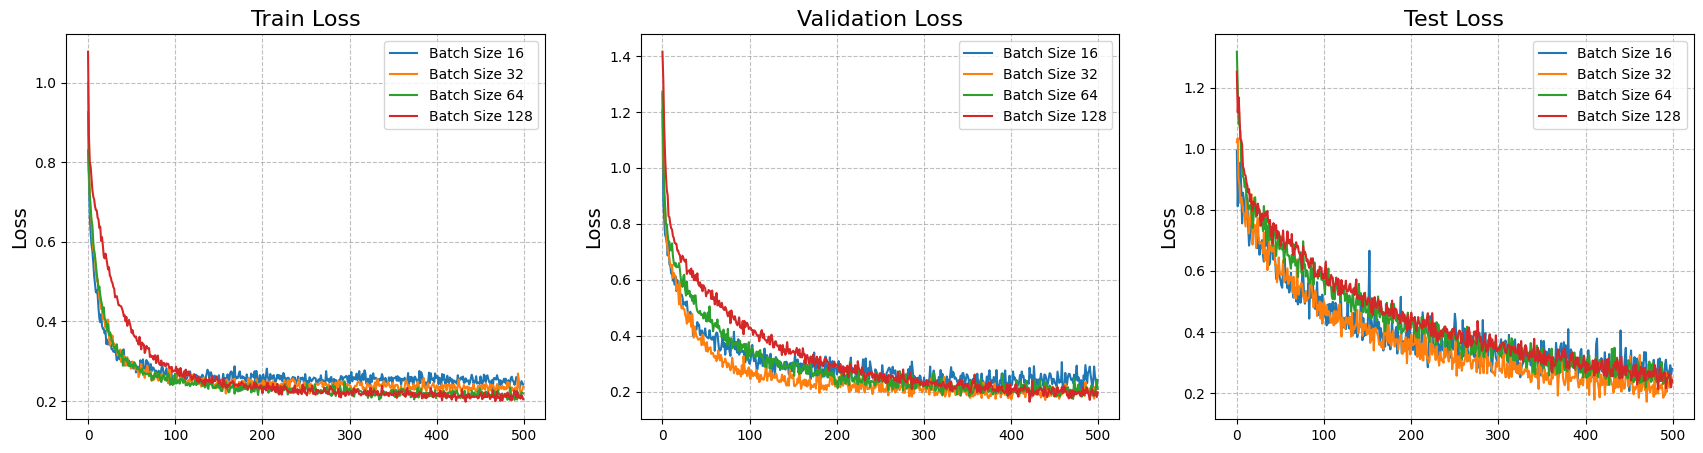

In [ ]:
#plot loss
fig, axes_loss = plt.subplots(1, 3, figsize=(21, 5))
for i, set_name in enumerate(['Train', 'Validation', 'Test']):
    ax = axes_loss[i]
    ax.set_title(f'{set_name} Loss', fontsize=16)
    ax.set_ylabel('Loss', fontsize=14)
    ax.grid(True, ls='--', alpha=0.5, color='grey')
    for batch_size in batch_sizes:
        ax.plot(losses[set_name][batch_size], label=f'Batch Size {batch_size}')
    ax.legend()
plt.show()

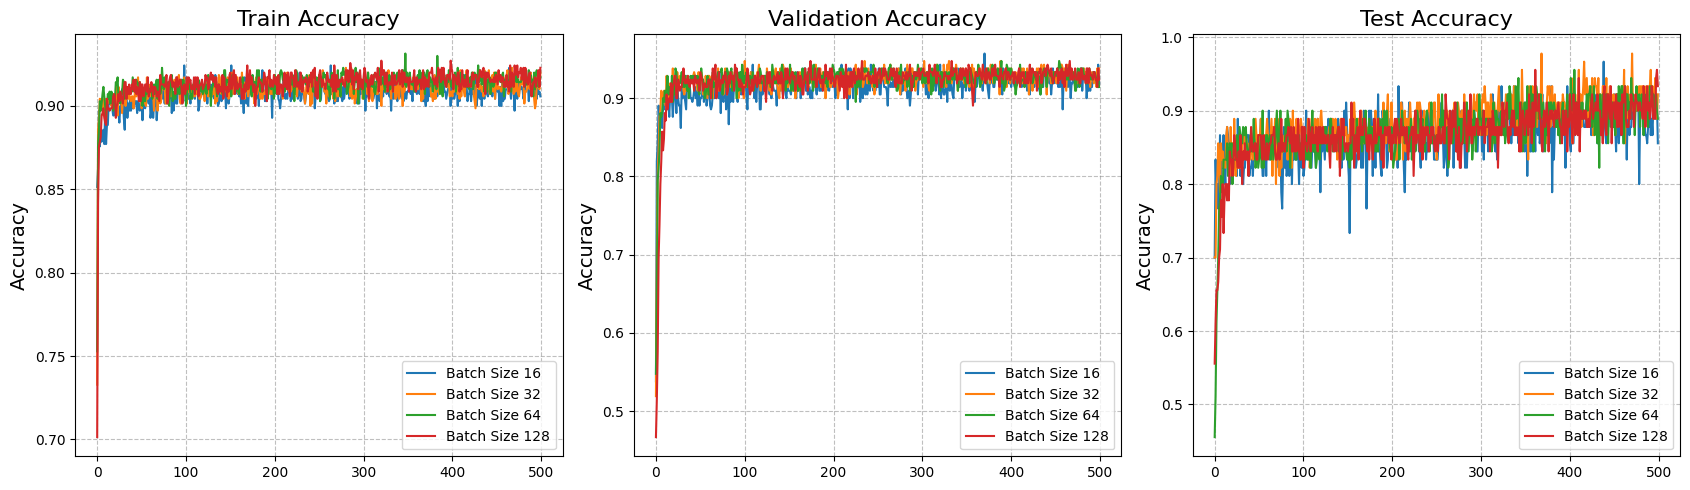

In [ ]:
#plot accuracy
fig, axes_accuracy = plt.subplots(1, 3, figsize=(17, 5))
for i, set_name in enumerate(['Train', 'Validation', 'Test']):
    ax = axes_accuracy[i]
    ax.set_title(f'{set_name} Accuracy', fontsize=16)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.grid(True, ls='--', alpha=0.5, color='grey')
    for batch_size in batch_sizes:
        ax.plot(accuracies[set_name][batch_size], label=f'Batch Size {batch_size}')
    ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
#compile the neural network model
#adam is a popular choice, which is an adaptive optimization algorithm.
model.compile(optimizer='adam',

#specify the loss function to measure the error during training. 'binary_crossentropy' is suitable for binary classification problems.
              loss='binary_crossentropy',

#define the metrics to be tracked during training. In this case, 'accuracy' is chosen to monitor how well the model is performing.
              metrics=['accuracy'])


<div style="background-color: silver; padding: 10px;">
    <strong><center style="font-size: 16px;">Early Stopping (Call Back)</center></strong>
</div>

"Early Stopping" is a technique used during model training to prevent overfitting and optimize the model's performance. It is implemented through a callback in deep learning frameworks like Keras and TensorFlow.

### The `EarlyStopping` Callback

The `EarlyStopping` callback is a powerful tool to control the training process. It monitors the model's performance during training and interrupts it when certain criteria are met. This is especially useful when the model starts to overfit the training data, resulting in a decrease in validation performance.

Here's an explanation of the key parameter used in the `EarlyStopping` callback:

- **`patience`**: The `patience` parameter specifies the number of epochs with no improvement on the monitored metric (usually validation loss or validation accuracy) after which training will be stopped. In other words, if the monitored metric does not improve for `patience` consecutive epochs, training will be halted. This helps prevent overfitting as it stops training when the model's performance on validation data begins to degrade.

- **`restore_best_weights`**: When set to `True`, this parameter ensures that the model's weights are restored to the best values observed during training before stopping. This is essential as training may continue for a few epochs after the best performance, and you want to retain the model with the best validation performance.



#### Choosing `patience` for Early Stopping Based on Dataset Size

#### Small Datasets (Few Hundred to Few Thousand Samples):

- With small datasets, you may want to use a smaller `patience` value, typically in the range of 5 to 15.
- Small datasets tend to show changes in performance relatively quickly, so a smaller `patience` allows the model to respond promptly to improvements or declines.

#### Medium Datasets (Few Thousand to Tens of Thousands of Samples):

- For medium-sized datasets, a `patience` value in the range of 10 to 30 is often reasonable.
- The model may require a bit more time to stabilize and show consistent trends in performance.

#### Large Datasets (Tens of Thousands to Millions of Samples):

- With large datasets, you can consider a larger `patience` value, such as 20 to 50 or even more.
- Large datasets often result in smoother learning curves, and it can take more epochs to observe significant changes in performance.


In [ ]:
#earlystopping callback to monitor the training process.
# - 'patience' is set to 20, which means training will stop if there's no improvement in the monitored metric for 20 consecutive epochs.
# - 'restore_best_weights' is set to True, ensuring that the model's weights will be reverted to the best-performing state when training stops.
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

In [ ]:
#training data and labels: `X_train` contains the training features, and `y_train` contains the corresponding labels/targets.
#these are used to teach the model to make predictions based on the training data.

#validation data: The `validation_data` parameter is set to a tuple `(X_val, y_val)`, which provides a separate dataset for model validation.
#during training, the model's performance on this dataset is monitored, helping to detect potential overfitting.

#number of epochs: `epochs` is set to 100, specifying that the model will go through the entire training dataset 100 times.
#each epoch represents one complete pass through the training data.

#callbacks: The `callbacks` parameter specifies a list of callbacks to be used during training.
#in this case, the `early_stopping` callback is included.
#The `early_stopping` callback is designed to monitor the model's validation performance and stop training if it detects a lack of improvement.

#the result of the training is stored in the `history` variable, which includes information
#about how the model's loss and metrics change during training.
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=128, epochs=300, verbose=1, callbacks=[early_stopping])

Epoch 1/300
6/6 [==============================] - 0s 17ms/step - loss: 0.3785 - accuracy: 0.9014 - val_loss: 0.5527 - val_accuracy: 0.7286
Epoch 2/300
6/6 [==============================] - 0s 10ms/step - loss: 0.3664 - accuracy: 0.9043 - val_loss: 0.5421 - val_accuracy: 0.7476
Epoch 3/300
6/6 [==============================] - 0s 10ms/step - loss: 0.3691 - accuracy: 0.9029 - val_loss: 0.5354 - val_accuracy: 0.7524
Epoch 4/300
6/6 [==============================] - 0s 9ms/step - loss: 0.3710 - accuracy: 0.9043 - val_loss: 0.5305 - val_accuracy: 0.7571
Epoch 5/300
6/6 [==============================] - 0s 10ms/step - loss: 0.3615 - accuracy: 0.9129 - val_loss: 0.5262 - val_accuracy: 0.7714
Epoch 6/300
6/6 [==============================] - 0s 9ms/step - loss: 0.3572 - accuracy: 0.9171 - val_loss: 0.5213 - val_accuracy: 0.8048
Epoch 7/300
6/6 [==============================] - 0s 9ms/step - loss: 0.3511 - accuracy: 0.9114 - val_loss: 0.5078 - val_accuracy: 0.8238
Epoch 8/300
6/6 [======

In [ ]:
#evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

3/3 [==============================] - 0s 4ms/step - loss: 0.3182 - accuracy: 0.8556
Test Loss: 0.3182
Test Accuracy: 0.8556


11622/11622 [==============================] - 20s 2ms/step


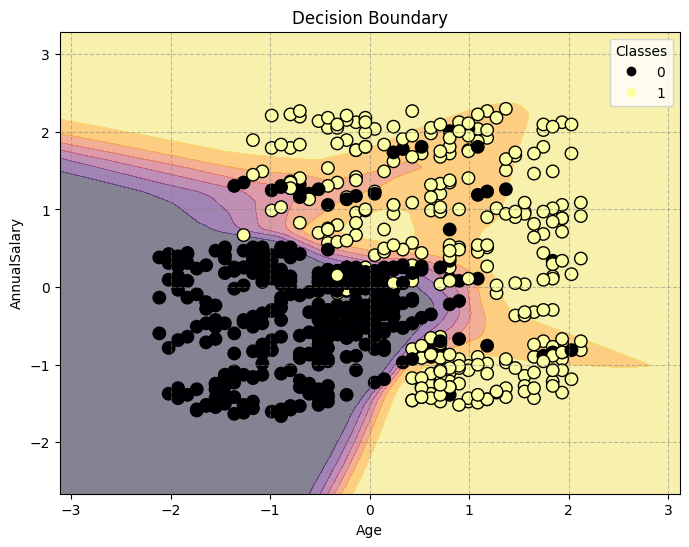

In [ ]:
#generate a grid of points that covers the feature space
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#predictions on the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = model.predict(grid_points).reshape(xx.shape)

#contour plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_predictions, cmap='inferno', alpha=0.5)
plt.xlabel(features_columns[0])
plt.ylabel(features_columns[1])
plt.title("Decision Boundary")
plt.grid(True, ls='--', alpha=0.5, color='grey')
# Scatter plot for actual "Purchased" data
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='inferno', edgecolor='k', s=80)
plt.legend(*scatter.legend_elements(), title="Classes", loc="upper right")
plt.show()

11369/11369 [==============================] - 19s 2ms/step


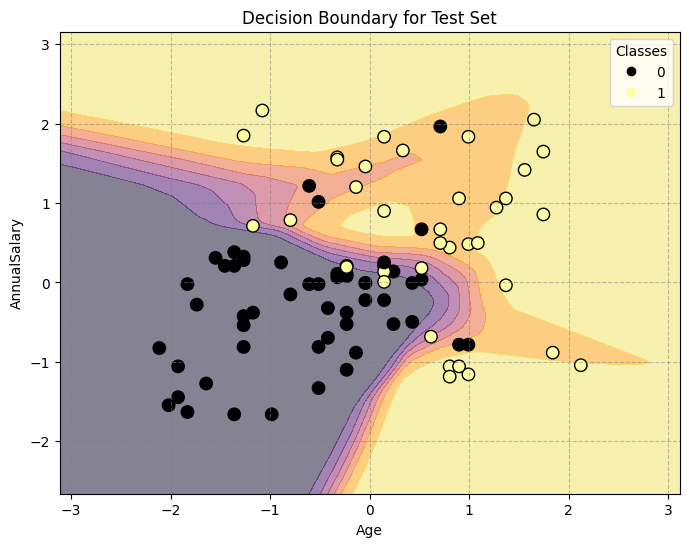

In [ ]:
#generate a grid of points that covers the feature space
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

#predictions on the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = model.predict(grid_points).reshape(xx.shape)

#contour plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_predictions, cmap='inferno', alpha=0.5)
plt.xlabel(features_columns[0])
plt.ylabel(features_columns[1])
plt.title("Decision Boundary for Test Set")
plt.grid(True, ls='--', alpha=0.5, color='grey')

#scatter plot for actual "Purchased" data from the test set
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='inferno', edgecolor='k', s=80)
plt.legend(*scatter.legend_elements(), title="Classes", loc="upper right")
plt.show()

In [ ]:
def plot_learning_curves(history):
    #plotting the training and validation loss
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, ls='--', alpha=0.5, color='grey')
    plt.legend()

    #plotting the training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, ls='--', alpha=0.5, color='grey')
    plt.tight_layout()
    plt.show()

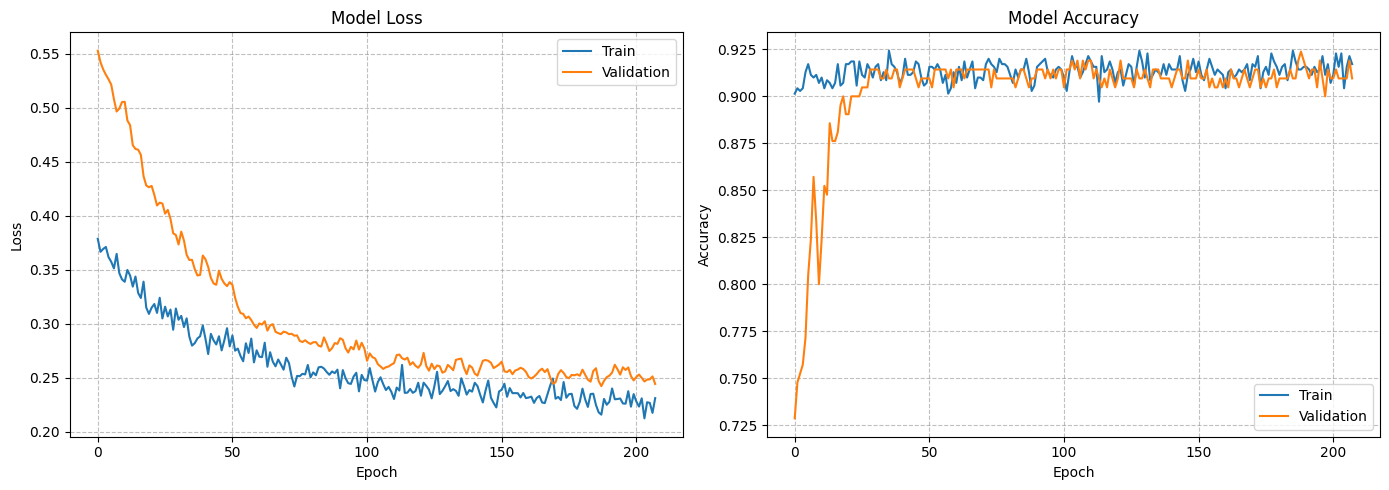

In [ ]:
#model loss and model accuracy
plot_learning_curves(history)

### MODEL EVALUATION

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#generate predictions on the training, validation, and test sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [ ]:
#training set
train_confusion_matrix = confusion_matrix(y_train, (y_train_pred > 0.5).astype(int))
TP_train = train_confusion_matrix[0, 0]  #true positives in training set
TN_train = train_confusion_matrix[1, 1]  #true negatives in training set
FP_train = train_confusion_matrix[0, 1]  #false positives in training set
FN_train = train_confusion_matrix[1, 0]  #false negatives in training set

In [ ]:
train_confusion_matrix

array([[379,  42],
       [ 19, 260]])

In [ ]:
#testing set
test_confusion_matrix = confusion_matrix(y_test, (y_test_pred > 0.5).astype(int))
TP_test = test_confusion_matrix[0, 0]  #true positives in testing set
TN_test = test_confusion_matrix[1, 1]  #true negatives in testing set
FP_test = test_confusion_matrix[0, 1]  #false positives in testing set
FN_test = test_confusion_matrix[1, 0]  #false negatives in testing set

In [ ]:
test_confusion_matrix

array([[47,  6],
       [ 7, 30]])

In [ ]:
#validation set
val_confusion_matrix = confusion_matrix(y_val, (y_val_pred > 0.5).astype(int))
TP_val = val_confusion_matrix[0, 0]  #true positives in validation set
TN_val = val_confusion_matrix[1, 1]  #true negatives in validation set
FP_val = val_confusion_matrix[0, 1]  #false positives in validation set
FN_val = val_confusion_matrix[1, 0]  #false negatives in validation set

In [ ]:
val_confusion_matrix

array([[116,   8],
       [  9,  77]])

In [ ]:
#calculate the total correctly and falsely predicted values
correctly_predicted_train = TP_train + TN_train
falsely_predicted_train = FP_train + FN_train
correctly_predicted_test = TP_test + TN_test
falsely_predicted_test = FP_test + FN_test
correctly_predicted_val = TP_val + TN_val
falsely_predicted_val = FP_val + FN_val

In [ ]:
#print the results
print("Training Set:\n")
print(f'True Positives: {TP_train}')
print(f'True Negatives: {TN_train}')
print(f'False Positives: {FP_train}')
print(f'False Negatives: {FN_train}')
print(f'Total Correctly Predicted: {correctly_predicted_train}')
print(f'Total Falsely Predicted: {falsely_predicted_train}')

Training Set:

True Positives: 379
True Negatives: 260
False Positives: 42
False Negatives: 19
Total Correctly Predicted: 639
Total Falsely Predicted: 61


In [ ]:
print("Testing Set:\n")
print(f'True Positives: {TP_test}')
print(f'True Negatives: {TN_test}')
print(f'False Positives: {FP_test}')
print(f'False Negatives: {FN_test}')
print(f'Total Correctly Predicted: {correctly_predicted_test}')
print(f'Total Falsely Predicted: {falsely_predicted_test}')

Testing Set:

True Positives: 47
True Negatives: 30
False Positives: 6
False Negatives: 7
Total Correctly Predicted: 77
Total Falsely Predicted: 13


In [ ]:
print("Validation Set:\n")
print(f'True Positives: {TP_val}')
print(f'True Negatives: {TN_val}')
print(f'False Positives: {FP_val}')
print(f'False Negatives: {FN_val}')
print(f'Total Correctly Predicted: {correctly_predicted_val}')
print(f'Total Falsely Predicted: {falsely_predicted_val}')

Validation Set:

True Positives: 116
True Negatives: 77
False Positives: 8
False Negatives: 9
Total Correctly Predicted: 193
Total Falsely Predicted: 17


In [ ]:
#function to plot a confusion matrix
def plot_confusion_matrix(matrix, title, ax):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Purchased', 'Purchased'],
                yticklabels=['Not Purchased', 'Purchased'], ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

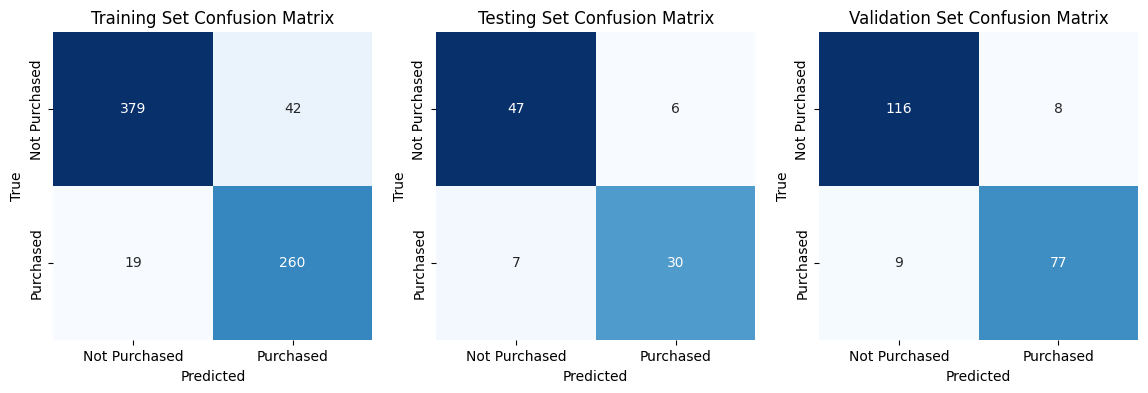

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
plot_confusion_matrix(train_confusion_matrix, 'Training Set Confusion Matrix', ax1)
plot_confusion_matrix(test_confusion_matrix, 'Testing Set Confusion Matrix', ax2)
plot_confusion_matrix(val_confusion_matrix, 'Validation Set Confusion Matrix', ax3)
plt.show()

## Classification Model Evaluation Report

### Training Set

- **True Positives:** 379
- **True Negatives:** 260
- **False Positives:** 42
- **False Negatives:** 19
- **Total Correctly Predicted:** 639
- **Total Falsely Predicted:** 61

### Testing Set

- **True Positives:** 47
- **True Negatives:** 30
- **False Positives:** 6
- **False Negatives:** 7
- **Total Correctly Predicted:** 77
- **Total Falsely Predicted:** 13

### Validation Set

- **True Positives:** 116
- **True Negatives:** 77
- **False Positives:** 8
- **False Negatives:** 9
- **Total Correctly Predicted:** 193
- **Total Falsely Predicted:** 17

### Conclusion

- The training set shows a relatively high number of True Positives (379) and True Negatives (260), resulting in a total of 639 correctly predicted cases. However, there are 61 cases of incorrect predictions.

- The testing set performs reasonably well with 47 True Positives and 30 True Negatives, resulting in 77 correctly predicted cases out of 90. There are 13 cases of incorrect predictions in the testing set.

- The validation set also shows a strong performance with 116 True Positives and 77 True Negatives, resulting in 193 correctly predicted. However, it has 17 cases of incorrect predictions.

- It's important to note that the validation set has the highest number of falsely predicted cases, indicating that the model's performance may need further optimization or tuning to reduce false predictions.


In [ ]:
#calculate confusion matrices
train_confusion_matrix = confusion_matrix(y_train, (y_train_pred > 0.5).astype(int))
val_confusion_matrix = confusion_matrix(y_val, (y_val_pred > 0.5).astype(int))
test_confusion_matrix = confusion_matrix(y_test, (y_test_pred > 0.5).astype(int))

In [ ]:
#print classification reports for training, validation, and testing sets
print("Training Set Classification Report:")
print(classification_report(y_train, (y_train_pred > 0.5).astype(int)))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       421
           1       0.86      0.93      0.90       279

    accuracy                           0.91       700
   macro avg       0.91      0.92      0.91       700
weighted avg       0.92      0.91      0.91       700



In [ ]:
print("Testing Set Classification Report:")
print(classification_report(y_test, (y_test_pred > 0.5).astype(int)))

Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        53
           1       0.83      0.81      0.82        37

    accuracy                           0.86        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90



In [ ]:
print("Validation Set Classification Report:")
print(classification_report(y_val, (y_val_pred > 0.5).astype(int)))

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       124
           1       0.91      0.90      0.90        86

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.92      0.92      0.92       210



#### **1. Training Set Classification Report:**

In the training set classification report, we evaluate the performance of the machine learning model on the dataset it was trained on.

- **Precision:** For class 0 (negative class), the precision is 0.95. This indicates that when the model predicts an instance as belonging to class 0, it is correct 95% of the time. For class 1 (positive class), the precision is 0.86, which means that 86% of the predictions for class 1 are accurate.

- **Recall:** The recall for class 0 is 0.90, implying that the model correctly identifies 90% of all actual instances of class 0. For class 1, the recall is 0.93, indicating that 93% of all actual instances of class 1 are correctly identified.

- **F1-Score:** The F1-score is the harmonic mean of precision and recall. For class 0, the F1-score is 0.93, while for class 1, it is 0.90. A higher F1-score suggests a balance between precision and recall.

- **Accuracy:** The model's overall accuracy on the training set is 0.91, which means it correctly predicts 91% of the instances.

- **Support:** The support column indicates the number of instances in each class. There are 421 instances of class 0 and 279 instances of class 1 in the training set.

#### **2. Testing Set Classification Report:**

The testing set classification report evaluates how well the model generalizes to new, unseen data.

- **Precision:** For class 0, the precision is 0.87, meaning that 87% of the predictions for class 0 are accurate. For class 1, the precision is 0.83, indicating 83% accuracy for class 1 predictions.

- **Recall:** Class 0 has a recall of 0.89, while class 1 has a recall of 0.81. This means that 89% of actual class 0 instances are correctly identified, and 81% of class 1 instances are correctly identified.

- **F1-Score:** The F1-scores are 0.88 for class 0 and 0.82 for class 1, indicating a balance between precision and recall for both classes.

- **Accuracy:** The model's accuracy on the testing set is 0.86, indicating that it correctly predicts 86% of the instances in the testing set.

- **Support:** There are 53 instances of class 0 and 37 instances of class 1 in the testing set.

#### **3. Validation Set Classification Report:**

The validation set classification report assesses the model's performance on a separate dataset that it hasn't seen during training.

- **Precision:** For class 0, the precision is 0.93, indicating 93% accuracy for class 0 predictions. For class 1, the precision is 0.91, meaning 91% accuracy for class 1 predictions.

- **Recall:** Class 0 has a recall of 0.94, while class 1 has a recall of 0.90. This suggests that the model correctly identifies 94% of class 0 instances and 90% of class 1 instances.

- **F1-Score:** The F1-scores are 0.93 for class 0 and 0.90 for class 1, representing a good balance between precision and recall for both classes.

- **Accuracy:** The model's accuracy on the validation set is 0.92, indicating that it correctly predicts 92% of the instances in the validation set.

- **Support:** There are 124 instances of class 0 and 86 instances of class 1 in the validation set.


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
#calculate ROC curves and AUC scores
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
auc_train = roc_auc_score(y_train, y_train_pred)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, y_test_pred)

fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred)
auc_val = roc_auc_score(y_val, y_val_pred)

In [ ]:
print(f"Training AUC: {auc_train:.2f}")
print(f"Testing AUC: {auc_test:.2f}")
print(f"Validation AUC: {auc_val:.2f}")

Training AUC: 0.98
Testing AUC: 0.95
Validation AUC: 0.96


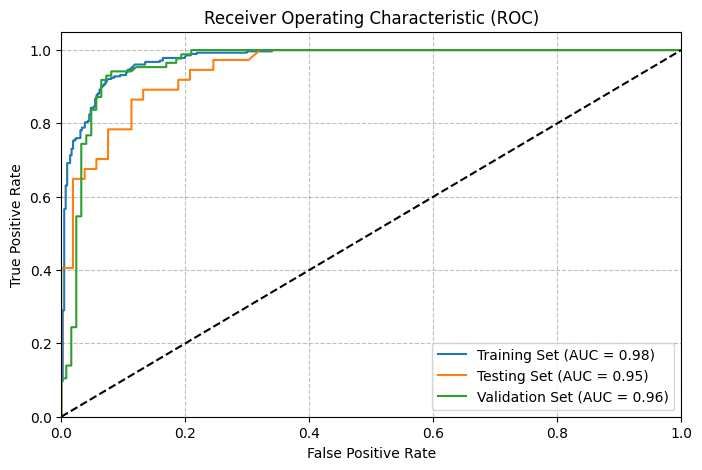

In [ ]:
#plotting all roc curve
plt.figure(figsize=(8, 5))
#trian data
plt.plot(fpr_train, tpr_train, label=f'Training Set (AUC = {auc_train:.2f})')
#test data
plt.plot(fpr_test, tpr_test, label=f'Testing Set (AUC = {auc_test:.2f})')
#validation data
plt.plot(fpr_val, tpr_val, label=f'Validation Set (AUC = {auc_val:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.show()

## Bridging the AUC Scores

The Area Under the Curve (AUC) is a key performance metric for binary classification models, representing the ability of a model to distinguish between the two classes. Here, we have the AUC scores for a model evaluated on different datasets: the training set, testing set, and validation set.

- **Training AUC: 0.98**  
  The training AUC of 0.98 indicates that the model has a strong ability to discriminate between the positive and negative classes in the data it was trained on. A higher AUC score suggests that the model has learned to make accurate predictions and effectively separate the classes.

- **Testing AUC: 0.95**  
  The testing AUC of 0.95 reflects the model's ability to generalize to new, unseen data. It demonstrates that the model maintains a strong ability to distinguish between the classes when applied to the testing dataset.

- **Validation AUC: 0.96**  
  The validation AUC of 0.96 is consistent with the training AUC, indicating that the model continues to perform well on a separate dataset. This demonstrates the model's ability to maintain strong discrimination capabilities in a real-world application.


## REFERENCES

1. **Logistic Regression Example using scikit-learn**
   - [Logistic Regression 3-class Classifier](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py)

2. **Feedforward Neural Networks Introduction**
   - [Introduction to Feedforward Deep Neural Networks](http://uc-r.github.io/feedforward_DNN)

3. **Comparison of Feed-Forward and Feedback Neural Networks**
   - [Feed-Forward vs. Feedback Neural Networks: A Comparative Analysis](https://blog.paperspace.com/feed-forward-vs-feedback-neural-networks/)

4. **Logistic Regression Overview**
   - [An Overview of Logistic Regression in Machine Learning](https://www.saedsayad.com/logistic_regression.htm)
